In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stepmix.bootstrap import blrt_sweep
import time
from stepmix.stepmix import StepMix
from sklearn.model_selection import GridSearchCV, ParameterGrid 
from pandas.plotting import table
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [10]:
pd.set_option('display.max_columns', None)  # Показывать все столбцы  
pd.set_option('display.max_rows', None)  # Показывать все строки  

In [11]:
df = pd.read_csv('arctic_survey_fin.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_9476\1908399592.py:1: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('arctic_survey_fin.csv')


In [12]:
df.head()

,№ \nанкеты,Город,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,1.10,1.11,1.12,1.13,2.1,2.2.1,2.2.2,2.2.3,2.2.4,2.2.5,2.2.6,2.2.7,2.2.8,2.2.9,2.2.10,2.2.11,2.2.12,2.3,2.3.1,2.3.2,2.3.3,2.3.4,2.3.5,2.3.6,2.3.7,2.3.8,2.3.9,2.3.10,2.3.11,2.4,2.5.1,2.5.2,2.5.3,2.6.1,2.6.2,2.6.3,2.7.1,2.7.2,2.7.3,2.8.1,2.8.2,2.8.3,2.9.1,2.9.2,2.9.3,2.10.1,2.10.2,2.10.3,2.11.1,2.11.2,2.11.3,2.12.1,2.12.2,2.12.3,2.13.1,2.13.2,2.13.3,3.1,3.2,3.3,3.4,3.5,3.6,Очный опрос,1.6.1,Регион,Группа,Промышленно развитый,3.1.1
0,NaN,Северодвинск,1,3,5,2,1,2,5,4,1,2,4,6,Нет,1+7+,5,4,5,5,5,3,2,2,5,2,3,3,5,3,6,6,5,6,5,6,6,6,4,6,4,1,затрудняюсь,не знаю,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,возможность обойти бешеные ставки на ипотеку,не эффективна,2,NaN,NaN,не известно,5,8,"несколько , названий не помню",2,+3+5+9+11+,1,1,Архангельская область,Есть дети,1,NaN
1,NaN,Мурманск,2,2,6,6,1,2,4,4,1,1,5,3,Нет,1+2+7+10+11+12,1,1,1,3,3,3,2,2,2,2,3,3,3,3,2,6,6,6,3,2,2,2,3,2,4,2,NaN,NaN,1,Снижение миграции населения,Нет\nВысокая цена развития инфраструктуры на у...,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,Миграция населения,Нет\nНе всем её дают,2,NaN,NaN,Неизвестно,6,+2+,Неизвестно,6,16,1,1,Мурманская область,Есть дети,0,NaN
2,NaN,Северодвинск,2,3,5,4,2,2,3,4,1,5,3,2,"Да,Заработная плата\n",1+3+6+7+11+,4,1,5,5,5,4,4,5,5,1,5,5,5,6,6,6,6,6,5,6,6,2,6,6,3,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,Неизвестно,6,8,Неизвестно,6,16,1,1,Архангельская область,Есть дети,1,NaN
3,NaN,Северодвинск,2,2,5,6,1,"1,2",4,4,1,1,3,1,Нет,1+2+3+4+5+6+7+11+12,2,2,2,2,2,3,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,На развитие предпринимательства,Да,1,"На рост демографии, на отток населения",Не везде. Расположение участков не всегда удач...,2,NaN,NaN,1,Развитие Арктических территорий,Возможно проблемой станет отсутствие финансиро...,1,На развитие Арктических муниципалитетов,Отсутствие финансирования на все запланированн...,1,"На развитие муниципалитетов Арктики, увеличени...",Отсутствие финансирования,2,NaN,NaN,1,"На снижения оттока населения, увеличение рожда...",Высокий первоначальный взнос,2,NaN,NaN,Компании группы ОСК,1,1+2+5+,Н,6,16,1,2,Архангельская область,Есть дети,1,NaN
4,NaN,Новый Уренгой,1,1,5,4,3,3,3,4,2,1,1,3,Нет,1+3+4+,1,1,2,1,1,2,1,2,2,2,2,1,2,1,1,1,2,1,2,1,2,1,2,2,4,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,не известно,3,+2+4+5+,не известно,2,+2+4+6+,1,4,Ямало-Ненецкий автономный округ (ЯНАО),Есть дети,1,NaN


In [13]:
df['Регион'].unique()

array(['Архангельская область', 'Мурманская область',
       'Ямало-Ненецкий автономный округ (ЯНАО)', 'Красноярский край',
       'Республика Коми', 'Ханты-Мансийский автономный округ (ХМАО)',
       'Республика Саха (Якутия)', 'Республика Карелия',
       'Ненецкий автономный округ', 'Чукотский автономный округ'],
      dtype=object)

In [14]:
df.columns

Index(['№ \nанкеты', 'Город', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7',
       '1.8', '1.9', '1.10', '1.11', '1.12', '1.13', '2.1', '2.2.1', '2.2.2',
       '2.2.3', '2.2.4', '2.2.5', '2.2.6', '2.2.7', '2.2.8', '2.2.9', '2.2.10',
       '2.2.11', '2.2.12', '2.3', '2.3.1', '2.3.2', '2.3.3', '2.3.4', '2.3.5',
       '2.3.6', '2.3.7', '2.3.8', '2.3.9', '2.3.10', '2.3.11', '2.4', '2.5.1',
       '2.5.2', '2.5.3', '2.6.1', '2.6.2', '2.6.3', '2.7.1', '2.7.2', '2.7.3',
       '2.8.1', '2.8.2', '2.8.3', '2.9.1', '2.9.2', '2.9.3', '2.10.1',
       '2.10.2', '2.10.3', '2.11.1', '2.11.2', '2.11.3', '2.12.1', '2.12.2',
       '2.12.3', '2.13.1', '2.13.2', '2.13.3', '3.1', '3.2', '3.3', '3.4',
       '3.5', '3.6', 'Очный опрос', '1.6.1', 'Регион', 'Группа',
       'Промышленно развитый', '3.1.1'],
      dtype='object')

In [15]:
df = df.drop(columns=['№ \nанкеты'])

In [16]:
# df = pd.get_dummies(df, columns=['Регион'], drop_first=True, dtype=int)

Описание колонок c 1.1 по 1.12:

В каком населённом пункте проходит опрос

1.1. - Пол, 1 - муж., 2 - жен.

1.2. Возраст. 1 - от 18 до 29, 2 - от 30 до 44, 3 - от 45 до 59, 4 - от 60 и ст.

1.3. Образование.

1) неполное среднее или ниже 2) среднее общее (школа) 3) начальное профессиональное (ПТУ, лицей и т.п.) 4) среднее специальное (ссуз, техникум, колледж, медицинское училище и т.п.) 5) незаконченное высшее (обучение в вузе без получения диплома) 6) высшее (диплом специалиста, бакалавра, магистра и т.п.) 7) аспирантура, учёная степень, звание 8) затрудняюсь ответить

1.4. Род занятий

1) Владелец бизнеса, предприниматель 2) Руководитель высшего звена управления 3) Руководитель среднего звена управления 4) Специалист/служащий/ инженерно-технический работник 5) Рабочий 6) Госслужащий/военнослужащий 7) Студент/учащийся 8) Пенсионер 9) Безработный/временно не работающий

1.5. Семейное положение

1) В официальном браке 2) В неофициальном браке (сожительствую) 3) Холост / не замужем 4) Разведен / разведена 5) Затрудняюсь ответить

1.6.1 Есть ли дети?

1) Один ребенок 2) Два ребенка 3) Три и более детей 4) Нет детей 5) Затрудняюсь ответить

1.7. Оцените материально положение Вашей семьи?

1) Денег не хватает даже на питание 2) На питание денег хватает, но одежду, обувь купить не можем 3) На одежду, обувь денег хватает, но крупную бытовую технику купить не можем 4) На бытовую технику денег хватает, но автомобиль купить не можем 5) На автомобиль денег хватает, но квартиру или дом купить не можем 6) На квартиру или дом денег хватает


1.8. Как давно Вы проживаете на территории региона?

1) Менее года 2) От 1 до 3 лет 3) Более 3-х лет 4) С рождения

1.9. В каком типе населенного пункта Вы проживаете на постоянной основе?

1) Крупный или большой город с населением от 100 тыс. до 1 млн чел. 2) Средний город от 50 тыс. до 100 тыс. чел. 3) Малый город до 50 тыс. чел. 4) Крупное или большое сельское поселение с населением от 1 до 3 тыс. чел. 5) Среднее сельское поселение от 200 до 1 тыс. чел. 6) Малое сельское поселение менее 200 чел.

1.10. Если говорить в целом, удовлетворены ли Вы качеством Вашей жизни? (Один ответ)

1) Удовлетворен 2) Скорее удовлетворен 3) Скорее не удовлетворен 4) Не удовлетворен 5) Затрудняюсь ответить

1.11. Как Вы считаете, в ближайший год Ваша жизнь, жизнь Ваших близких улучшится, ухудшится, останется неизменной? (Один ответ)

1) Безусловно улучшится 2) Скорее улучшится 3) Скорее ухудшится 4) Безусловно ухудшится 5) Останется неизменной 6) Затрудняюсь ответить

1.12. Какие настроения преобладают среди Вас и Ваших родных, друзей, знакомых в отношении жизни в Арктике? (Один ответ)

0 - не планируем переезжать
1 - планируем переезжать

In [17]:
df = df.drop(columns=['1.6'])  # Удаляем колонку 1.6

# Перемещаем 1.6.1 между 1.5 и 1.7
cols = df.columns.tolist()
cols.insert(cols.index('1.7'), cols.pop(cols.index('1.6.1')))
df = df[cols]

In [18]:
df.head()

,Город,1.1,1.2,1.3,1.4,1.5,1.6.1,1.7,1.8,1.9,1.10,1.11,1.12,1.13,2.1,2.2.1,2.2.2,2.2.3,2.2.4,2.2.5,2.2.6,2.2.7,2.2.8,2.2.9,2.2.10,2.2.11,2.2.12,2.3,2.3.1,2.3.2,2.3.3,2.3.4,2.3.5,2.3.6,2.3.7,2.3.8,2.3.9,2.3.10,2.3.11,2.4,2.5.1,2.5.2,2.5.3,2.6.1,2.6.2,2.6.3,2.7.1,2.7.2,2.7.3,2.8.1,2.8.2,2.8.3,2.9.1,2.9.2,2.9.3,2.10.1,2.10.2,2.10.3,2.11.1,2.11.2,2.11.3,2.12.1,2.12.2,2.12.3,2.13.1,2.13.2,2.13.3,3.1,3.2,3.3,3.4,3.5,3.6,Очный опрос,Регион,Группа,Промышленно развитый,3.1.1
0,Северодвинск,1,3,5,2,1,1,5,4,1,2,4,6,Нет,1+7+,5,4,5,5,5,3,2,2,5,2,3,3,5,3,6,6,5,6,5,6,6,6,4,6,4,1,затрудняюсь,не знаю,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,возможность обойти бешеные ставки на ипотеку,не эффективна,2,NaN,NaN,не известно,5,8,"несколько , названий не помню",2,+3+5+9+11+,1,Архангельская область,Есть дети,1,NaN
1,Мурманск,2,2,6,6,1,1,4,4,1,1,5,3,Нет,1+2+7+10+11+12,1,1,1,3,3,3,2,2,2,2,3,3,3,3,2,6,6,6,3,2,2,2,3,2,4,2,NaN,NaN,1,Снижение миграции населения,Нет\nВысокая цена развития инфраструктуры на у...,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,Миграция населения,Нет\nНе всем её дают,2,NaN,NaN,Неизвестно,6,+2+,Неизвестно,6,16,1,Мурманская область,Есть дети,0,NaN
2,Северодвинск,2,3,5,4,2,1,3,4,1,5,3,2,"Да,Заработная плата\n",1+3+6+7+11+,4,1,5,5,5,4,4,5,5,1,5,5,5,6,6,6,6,6,5,6,6,2,6,6,3,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,Неизвестно,6,8,Неизвестно,6,16,1,Архангельская область,Есть дети,1,NaN
3,Северодвинск,2,2,5,6,1,2,4,4,1,1,3,1,Нет,1+2+3+4+5+6+7+11+12,2,2,2,2,2,3,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,На развитие предпринимательства,Да,1,"На рост демографии, на отток населения",Не везде. Расположение участков не всегда удач...,2,NaN,NaN,1,Развитие Арктических территорий,Возможно проблемой станет отсутствие финансиро...,1,На развитие Арктических муниципалитетов,Отсутствие финансирования на все запланированн...,1,"На развитие муниципалитетов Арктики, увеличени...",Отсутствие финансирования,2,NaN,NaN,1,"На снижения оттока населения, увеличение рожда...",Высокий первоначальный взнос,2,NaN,NaN,Компании группы ОСК,1,1+2+5+,Н,6,16,1,Архангельская область,Есть дети,1,NaN
4,Новый Уренгой,1,1,5,4,3,4,3,4,2,1,1,3,Нет,1+3+4+,1,1,2,1,1,2,1,2,2,2,2,1,2,1,1,1,2,1,2,1,2,1,2,2,4,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,не известно,3,+2+4+5+,не известно,2,+2+4+6+,1,Ямало-Ненецкий автономный округ (ЯНАО),Есть дети,1,NaN


Уберем неопределенные овтеты

In [19]:
df['1.3'].replace(8, np.nan, inplace=True)
df['1.5'].replace(5, np.nan, inplace=True)
df['1.6.1'].replace(5, np.nan, inplace=True)
df['1.10'].replace(5, np.nan, inplace=True)
df['1.11'].replace(6, np.nan, inplace=True)
df['1.12'].replace(6, np.nan, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_9476\933740772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['1.3'].replace(8, np.nan, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9476\933740772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [20]:
df = df.drop(columns=['1.13', '2.1'])

In [21]:
cols_to_replace = ['2.2.1', '2.2.2', '2.2.3', '2.2.4', '2.2.5', '2.2.6', 
                   '2.2.7', '2.2.8', '2.2.9', '2.2.10', '2.2.11', '2.2.12']

df[cols_to_replace] = df[cols_to_replace].replace(5, np.nan)

In [22]:
# Список колонок для замены значения 6 на NaN
cols_to_replace = ['2.3', '2.3.1', '2.3.2', '2.3.3', '2.3.4', '2.3.5', 
                   '2.3.6', '2.3.7', '2.3.8', '2.3.9', '2.3.10', '2.3.11']

# Заменяем 6 на NaN в указанных колонках
df[cols_to_replace] = df[cols_to_replace].replace(6, np.nan)

### Посчитаем, что не нравится тем, кто хочет уехать. 

Инвертируем оценки, чтобы более высокая оценка обозначалась большим числом

In [23]:
df[['2.2.1', '2.2.2', '2.2.3', '2.2.4', '2.2.5', '2.2.6', 
            '2.2.7', '2.2.8', '2.2.9', '2.2.10', '2.2.11', '2.2.12']] = 5 - df[['2.2.1', '2.2.2', '2.2.3', '2.2.4', 
                                                                                        '2.2.5', '2.2.6','2.2.7', '2.2.8', 
                                                                                        '2.2.9', '2.2.10', '2.2.11', '2.2.12']]

In [24]:
df_expectation = df.copy()

In [25]:
df_expectation['1.11_reversed'] = df_expectation['1.11'].map({
    4: 1,  # Безусловно ухудшится → 1
    3: 2,  # Скорее ухудшится → 2
    5: 3,  # Останется неизменной → 3
    2: 4,  # Скорее улучшится → 4
    1: 5   # Безусловно улучшится → 5
})

Оставим только тех, кто ждет в будущем ухудшения жизни.

In [26]:
df_expectation_filtered = df_expectation[df_expectation['1.11_reversed'].isin([1, 2])]

In [27]:
df_expectation_filtered.columns

Index(['Город', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6.1', '1.7', '1.8',
       '1.9', '1.10', '1.11', '1.12', '2.2.1', '2.2.2', '2.2.3', '2.2.4',
       '2.2.5', '2.2.6', '2.2.7', '2.2.8', '2.2.9', '2.2.10', '2.2.11',
       '2.2.12', '2.3', '2.3.1', '2.3.2', '2.3.3', '2.3.4', '2.3.5', '2.3.6',
       '2.3.7', '2.3.8', '2.3.9', '2.3.10', '2.3.11', '2.4', '2.5.1', '2.5.2',
       '2.5.3', '2.6.1', '2.6.2', '2.6.3', '2.7.1', '2.7.2', '2.7.3', '2.8.1',
       '2.8.2', '2.8.3', '2.9.1', '2.9.2', '2.9.3', '2.10.1', '2.10.2',
       '2.10.3', '2.11.1', '2.11.2', '2.11.3', '2.12.1', '2.12.2', '2.12.3',
       '2.13.1', '2.13.2', '2.13.3', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6',
       'Очный опрос', 'Регион', 'Группа', 'Промышленно развитый', '3.1.1',
       '1.11_reversed'],
      dtype='object')

Посмотрим, как оценивают социальные сферы те жители, которые ждут ухудшения жизни

In [28]:
columns_to_describe = [
    '2.2.1', '2.2.2', '2.2.3', '2.2.4', '2.2.5', '2.2.6',
    '2.2.7', '2.2.8', '2.2.9', '2.2.10', '2.2.11', '2.2.12'
]

df_expectation_filtered[columns_to_describe].describe()

,2.2.1,2.2.2,2.2.3,2.2.4,2.2.5,2.2.6,2.2.7,2.2.8,2.2.9,2.2.10,2.2.11,2.2.12
count,2223.000000,1889.000000,2192.000000,2079.000000,1526.000000,1608.000000,2175.000000,2006.000000,2034.000000,2062.000000,2099.000000,2028.000000
mean,2.474584,2.662785,2.655566,2.477633,2.828309,2.739428,2.164598,2.585244,2.495575,2.831717,2.593616,2.550789
std,1.001869,0.818287,0.941209,0.820429,0.912937,0.955715,0.897475,1.003963,0.852201,0.920573,1.020840,0.836326
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


А теперь посмотрим, что нравится и не нравится тем респондентам, которые прожили в арктике 1-3 года и которые ждут ухудшения жизни.

In [29]:
df_expectation_filtered_2 = df_expectation_filtered[df_expectation_filtered['1.8'] == 2]

In [30]:
df_expectation_filtered_2.head()

,Город,1.1,1.2,1.3,1.4,1.5,1.6.1,1.7,1.8,1.9,1.10,1.11,1.12,2.2.1,2.2.2,2.2.3,2.2.4,2.2.5,2.2.6,2.2.7,2.2.8,2.2.9,2.2.10,2.2.11,2.2.12,2.3,2.3.1,2.3.2,2.3.3,2.3.4,2.3.5,2.3.6,2.3.7,2.3.8,2.3.9,2.3.10,2.3.11,2.4,2.5.1,2.5.2,2.5.3,2.6.1,2.6.2,2.6.3,2.7.1,2.7.2,2.7.3,2.8.1,2.8.2,2.8.3,2.9.1,2.9.2,2.9.3,2.10.1,2.10.2,2.10.3,2.11.1,2.11.2,2.11.3,2.12.1,2.12.2,2.12.3,2.13.1,2.13.2,2.13.3,3.1,3.2,3.3,3.4,3.5,3.6,Очный опрос,Регион,Группа,Промышленно развитый,3.1.1,1.11_reversed
436,Мурманск,2,2,6.0,4,2.0,4.0,3,2,1,3.0,3.0,2.0,1.0,3.0,1.0,3.0,NaN,2.0,2.0,NaN,1.0,3.0,4.0,3.0,3.0,2.0,4.0,NaN,NaN,3.0,3.0,NaN,NaN,2.0,2.0,2.0,3,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,О программе слышала но её содержание мне неизв...,О программе слышала но её содержание мне неизв...,2,NaN,NaN,Атомфлот\nНорникель,3,+2+4+,Не известно,6,16,1,Мурманская область,Есть дети,0,"Росатом, Норильский никель",2.0
700,Мончегорск,2,1,4.0,4,1.0,1.0,3,2,3,2.0,3.0,4.0,4.0,4.0,3.0,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,Нет,3,1+,Нет,2,1+4+6+,1,Мурманская область,Есть дети,1,NaN,2.0
1010,Ноябрьск,2,3,3.0,4,2.0,1.0,5,2,1,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,ПАО «НОВАТЭК»\nООО «Газпром добыча Уренгой»\nО...,3,1+2+4+,Не известно,6,1+3+5+8+12+13+,1,Ямало-Ненецкий автономный округ (ЯНАО),Есть дети,1,"Газпром, Новатэк",1.0
1025,Мурманск,2,2,6.0,4,2.0,4.0,3,2,1,3.0,3.0,2.0,1.0,3.0,1.0,3.0,NaN,2.0,2.0,NaN,1.0,3.0,4.0,3.0,3.0,2.0,4.0,NaN,NaN,3.0,3.0,NaN,NaN,2.0,2.0,2.0,3,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,О программе слышала но её содержание мне неизв...,О программе слышала но её содержание мне неизв...,2,NaN,NaN,Атомфлот\nНорникель,3,+2+4+,Не известно,6,16,1,Мурманская область,Есть дети,0,"Росатом, Норильский никель",2.0
1343,Мурманск,2,2,6.0,4,2.0,4.0,3,2,1,3.0,3.0,2.0,1.0,3.0,1.0,3.0,NaN,2.0,2.0,NaN,1.0,3.0,4.0,3.0,3.0,2.0,4.0,NaN,NaN,3.0,3.0,NaN,NaN,2.0,2.0,2.0,3,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,1,О программе слышала но её содержание мне неизв...,О программе слышала но её содержание мне неизв...,2,NaN,NaN,Атомфлот\nНорникель,3,+2+4+,Не известно,6,16,1,Мурманская область,Есть дети,0,"Росатом, Норильский никель",2.0


In [31]:
df_expectation_filtered_2[columns_to_describe].describe()

,2.2.1,2.2.2,2.2.3,2.2.4,2.2.5,2.2.6,2.2.7,2.2.8,2.2.9,2.2.10,2.2.11,2.2.12
count,412.000000,411.000000,412.000000,406.000000,395.000000,405.000000,407.000000,403.000000,411.000000,408.000000,405.000000,404.000000
mean,2.958738,3.000000,2.927184,2.945813,2.974684,2.965432,2.941032,2.923077,2.905109,2.980392,2.990123,2.970297
std,0.383030,0.296319,0.394042,0.339963,0.255631,0.279303,0.373325,0.419118,0.434206,0.270785,0.281265,0.305628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


#### Удалим ненужные для LCA колонки

In [32]:
# Список колонок для удаления
cols_to_drop = ['2.4', '2.5.1', '2.5.2', '2.5.3', '2.6.1', '2.6.2', '2.6.3', 
                '2.7.1', '2.7.2', '2.7.3', '2.8.1', '2.8.2', '2.8.3', '2.9.1', 
                '2.9.2', '2.9.3', '2.10.1', '2.10.2', '2.10.3', '2.11.1', '2.11.2', 
                '2.11.3', '2.12.1', '2.12.2', '2.12.3', '2.13.1', '2.13.2', '2.13.3', 
                '3.1', '3.2', '3.3', '3.4', '3.5', '3.6']

# Удаляем колонки
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [33]:
df.head()

,Город,1.1,1.2,1.3,1.4,1.5,1.6.1,1.7,1.8,1.9,1.10,1.11,1.12,2.2.1,2.2.2,2.2.3,2.2.4,2.2.5,2.2.6,2.2.7,2.2.8,2.2.9,2.2.10,2.2.11,2.2.12,2.3,2.3.1,2.3.2,2.3.3,2.3.4,2.3.5,2.3.6,2.3.7,2.3.8,2.3.9,2.3.10,2.3.11,Очный опрос,Регион,Группа,Промышленно развитый,3.1.1
0,Северодвинск,1,3,5.0,2,1.0,1.0,5,4,1,2.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,3.0,3.0,NaN,3.0,2.0,2.0,5.0,3.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,4.0,NaN,1,Архангельская область,Есть дети,1,NaN
1,Мурманск,2,2,6.0,6,1.0,1.0,4,4,1,1.0,5.0,3.0,4.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,NaN,NaN,NaN,3.0,2.0,2.0,2.0,3.0,2.0,1,Мурманская область,Есть дети,0,NaN
2,Северодвинск,2,3,5.0,4,2.0,1.0,3,4,1,NaN,3.0,2.0,1.0,4.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.0,NaN,NaN,1,Архангельская область,Есть дети,1,NaN
3,Северодвинск,2,2,5.0,6,1.0,2.0,4,4,1,1.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,Архангельская область,Есть дети,1,NaN
4,Новый Уренгой,1,1,5.0,4,3.0,4.0,3,4,2,1.0,1.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1,Ямало-Ненецкий автономный округ (ЯНАО),Есть дети,1,NaN


### При помощи хи-квадрата посчитаем, есть ли связь между желанием уехать и верой в ухудшение жизни.

In [34]:
# Список колонок с 2.2.1 по 2.2.12
columns_2_2 = [f'2.2.{i}' for i in range(1, 13)]

# Создание нового датафрейма с нужными колонками
new_df = df[['1.11', '1.12', 'Регион'] + columns_2_2]


In [35]:
# new_df = new_df.dropna()

In [36]:
new_df['1.12_binary'] = np.where(new_df['1.12'] == 1, 0, 1)

C:\Users\User\AppData\Local\Temp\ipykernel_9476\1319376965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['1.12_binary'] = np.where(new_df['1.12'] == 1, 0, 1)


In [37]:
new_df.head()

,1.11,1.12,Регион,2.2.1,2.2.2,2.2.3,2.2.4,2.2.5,2.2.6,2.2.7,2.2.8,2.2.9,2.2.10,2.2.11,2.2.12,1.12_binary
0,4.0,NaN,Архангельская область,NaN,1.0,NaN,NaN,NaN,2.0,3.0,3.0,NaN,3.0,2.0,2.0,1
1,5.0,3.0,Мурманская область,4.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,1
2,3.0,2.0,Архангельская область,1.0,4.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,NaN,NaN,1
3,3.0,1.0,Архангельская область,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,0
4,1.0,3.0,Ямало-Ненецкий автономный округ (ЯНАО),4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,1


Построим таблицу сопряженности.

In [38]:
contingency_table = pd.crosstab(new_df['1.12_binary'], new_df['1.11'])
print(contingency_table)

1.11          1.0   2.0   3.0  4.0   5.0
1.12_binary                             
0            1976  1066   170   19   315
1             768  1100  1647  444  1159


In [39]:
# Применяем критерий хи-квадрат к таблице сопряженности
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Вывод результатов
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 2400.1324
Degrees of freedom: 4
P-value: 0.0000
Expected frequencies:
[[1123.06371191  886.5         743.66135734  189.4965374   603.27839335]
 [1620.93628809 1279.5        1073.33864266  273.5034626   870.72160665]]


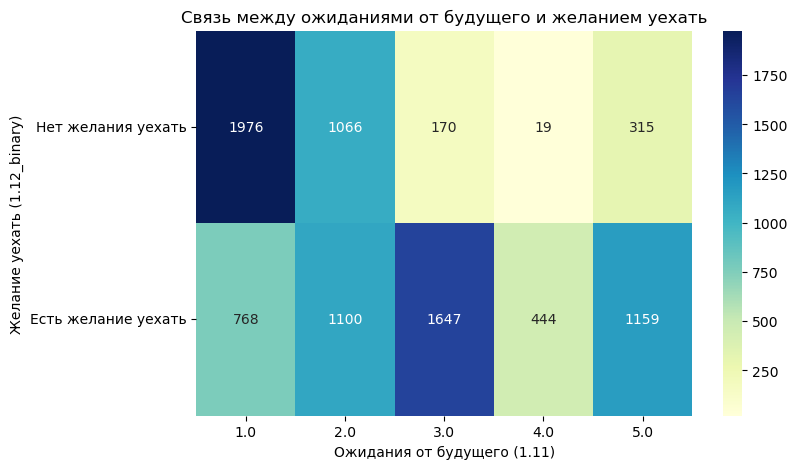

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Таблица сопряженности уже есть:
# contingency_table

plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Связь между ожиданиями от будущего и желанием уехать')
plt.xlabel('Ожидания от будущего (1.11)')
plt.ylabel('Желание уехать (1.12_binary)')
plt.yticks([0.5, 1.5], ['Нет желания уехать', 'Есть желание уехать'], rotation=0)
plt.show()


Теперь рассчитаем критерий хи-квадрат для колонок 2.2.1 - 2.2.12, которые описывают удовлетворение социальными сферами

In [41]:
import pandas as pd
from scipy.stats import chi2_contingency

columns_to_test = [f'2.2.{i}' for i in range(1, 13)]
target = '1.12_binary'

results = []
contingency_tables = {}

for col in columns_to_test:
    contingency_table = pd.crosstab(new_df[target], new_df[col])
    contingency_tables[col] = contingency_table
    
    try:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append({
            'variable': col,
            'chi2': chi2,
            'dof': dof,
            'p_value': p
        })
    except ValueError as e:
        results.append({
            'variable': col,
            'chi2': None,
            'dof': None,
            'p_value': None,
            'error': str(e)
        })

chi2_results = pd.DataFrame(results)
print("Результаты хи-квадрат:\n", chi2_results)

# Вывод всех таблиц сопряженности
for var, table in contingency_tables.items():
    print(f"\nТаблица сопряженности для переменной {var}:")
    print(table)


Результаты хи-квадрат:
    variable         chi2  dof        p_value
0     2.2.1  1039.278982    3  5.422006e-225
1     2.2.2  1230.273801    3  1.980305e-266
2     2.2.3   610.381392    3  5.659986e-132
3     2.2.4   938.437875    3  4.068267e-203
4     2.2.5   465.409586    3  1.494102e-100
5     2.2.6   404.382459    3   2.488118e-87
6     2.2.7  1645.329663    3   0.000000e+00
7     2.2.8   621.311952    3  2.416106e-134
8     2.2.9   928.713027    3  5.234513e-201
9    2.2.10   515.116005    3  2.527633e-111
10   2.2.11   425.891242    3   5.451267e-92
11   2.2.12   723.921452    3  1.364076e-156

Таблица сопряженности для переменной 2.2.1:
2.2.1         1.0   2.0   3.0   4.0
1.12_binary                        
0             198   323  1497  1641
1            1032  1299  2483  1089

Таблица сопряженности для переменной 2.2.2:
2.2.2        1.0  2.0   3.0   4.0
1.12_binary                      
0             68  179  1682  1709
1            431  878  3338   853

Таблица сопряженност

### Продолжим подготовку датасета для LCA

In [42]:
df = df.drop(["Группа", "Промышленно развитый", "3.1.1", 'Очный опрос', 'Город', 'Регион'], axis=1)

In [43]:
df.head()

,1.1,1.2,1.3,1.4,1.5,1.6.1,1.7,1.8,1.9,1.10,1.11,1.12,2.2.1,2.2.2,2.2.3,2.2.4,2.2.5,2.2.6,2.2.7,2.2.8,2.2.9,2.2.10,2.2.11,2.2.12,2.3,2.3.1,2.3.2,2.3.3,2.3.4,2.3.5,2.3.6,2.3.7,2.3.8,2.3.9,2.3.10,2.3.11
0,1,3,5.0,2,1.0,1.0,5,4,1,2.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,3.0,3.0,NaN,3.0,2.0,2.0,5.0,3.0,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,4.0,NaN
1,2,2,6.0,6,1.0,1.0,4,4,1,1.0,5.0,3.0,4.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,NaN,NaN,NaN,3.0,2.0,2.0,2.0,3.0,2.0
2,2,3,5.0,4,2.0,1.0,3,4,1,NaN,3.0,2.0,1.0,4.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.0,NaN,NaN
3,2,2,5.0,6,1.0,2.0,4,4,1,1.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1,1,5.0,4,3.0,4.0,3,4,2,1.0,1.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10022 entries, 0 to 10021
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1.1     10022 non-null  int64  
 1   1.2     10022 non-null  int64  
 2   1.3     10000 non-null  float64
 3   1.4     10022 non-null  int64  
 4   1.5     9906 non-null   float64
 5   1.6.1   9972 non-null   float64
 6   1.7     10022 non-null  int64  
 7   1.8     10022 non-null  int64  
 8   1.9     10022 non-null  int64  
 9   1.10    9308 non-null   float64
 10  1.11    8664 non-null   float64
 11  1.12    8957 non-null   float64
 12  2.2.1   9562 non-null   float64
 13  2.2.2   9138 non-null   float64
 14  2.2.3   9210 non-null   float64
 15  2.2.4   8871 non-null   float64
 16  2.2.5   6911 non-null   float64
 17  2.2.6   7057 non-null   float64
 18  2.2.7   9374 non-null   float64
 19  2.2.8   8560 non-null   float64
 20  2.2.9   8620 non-null   float64
 21  2.2.10  8871 non-null   float64
 22

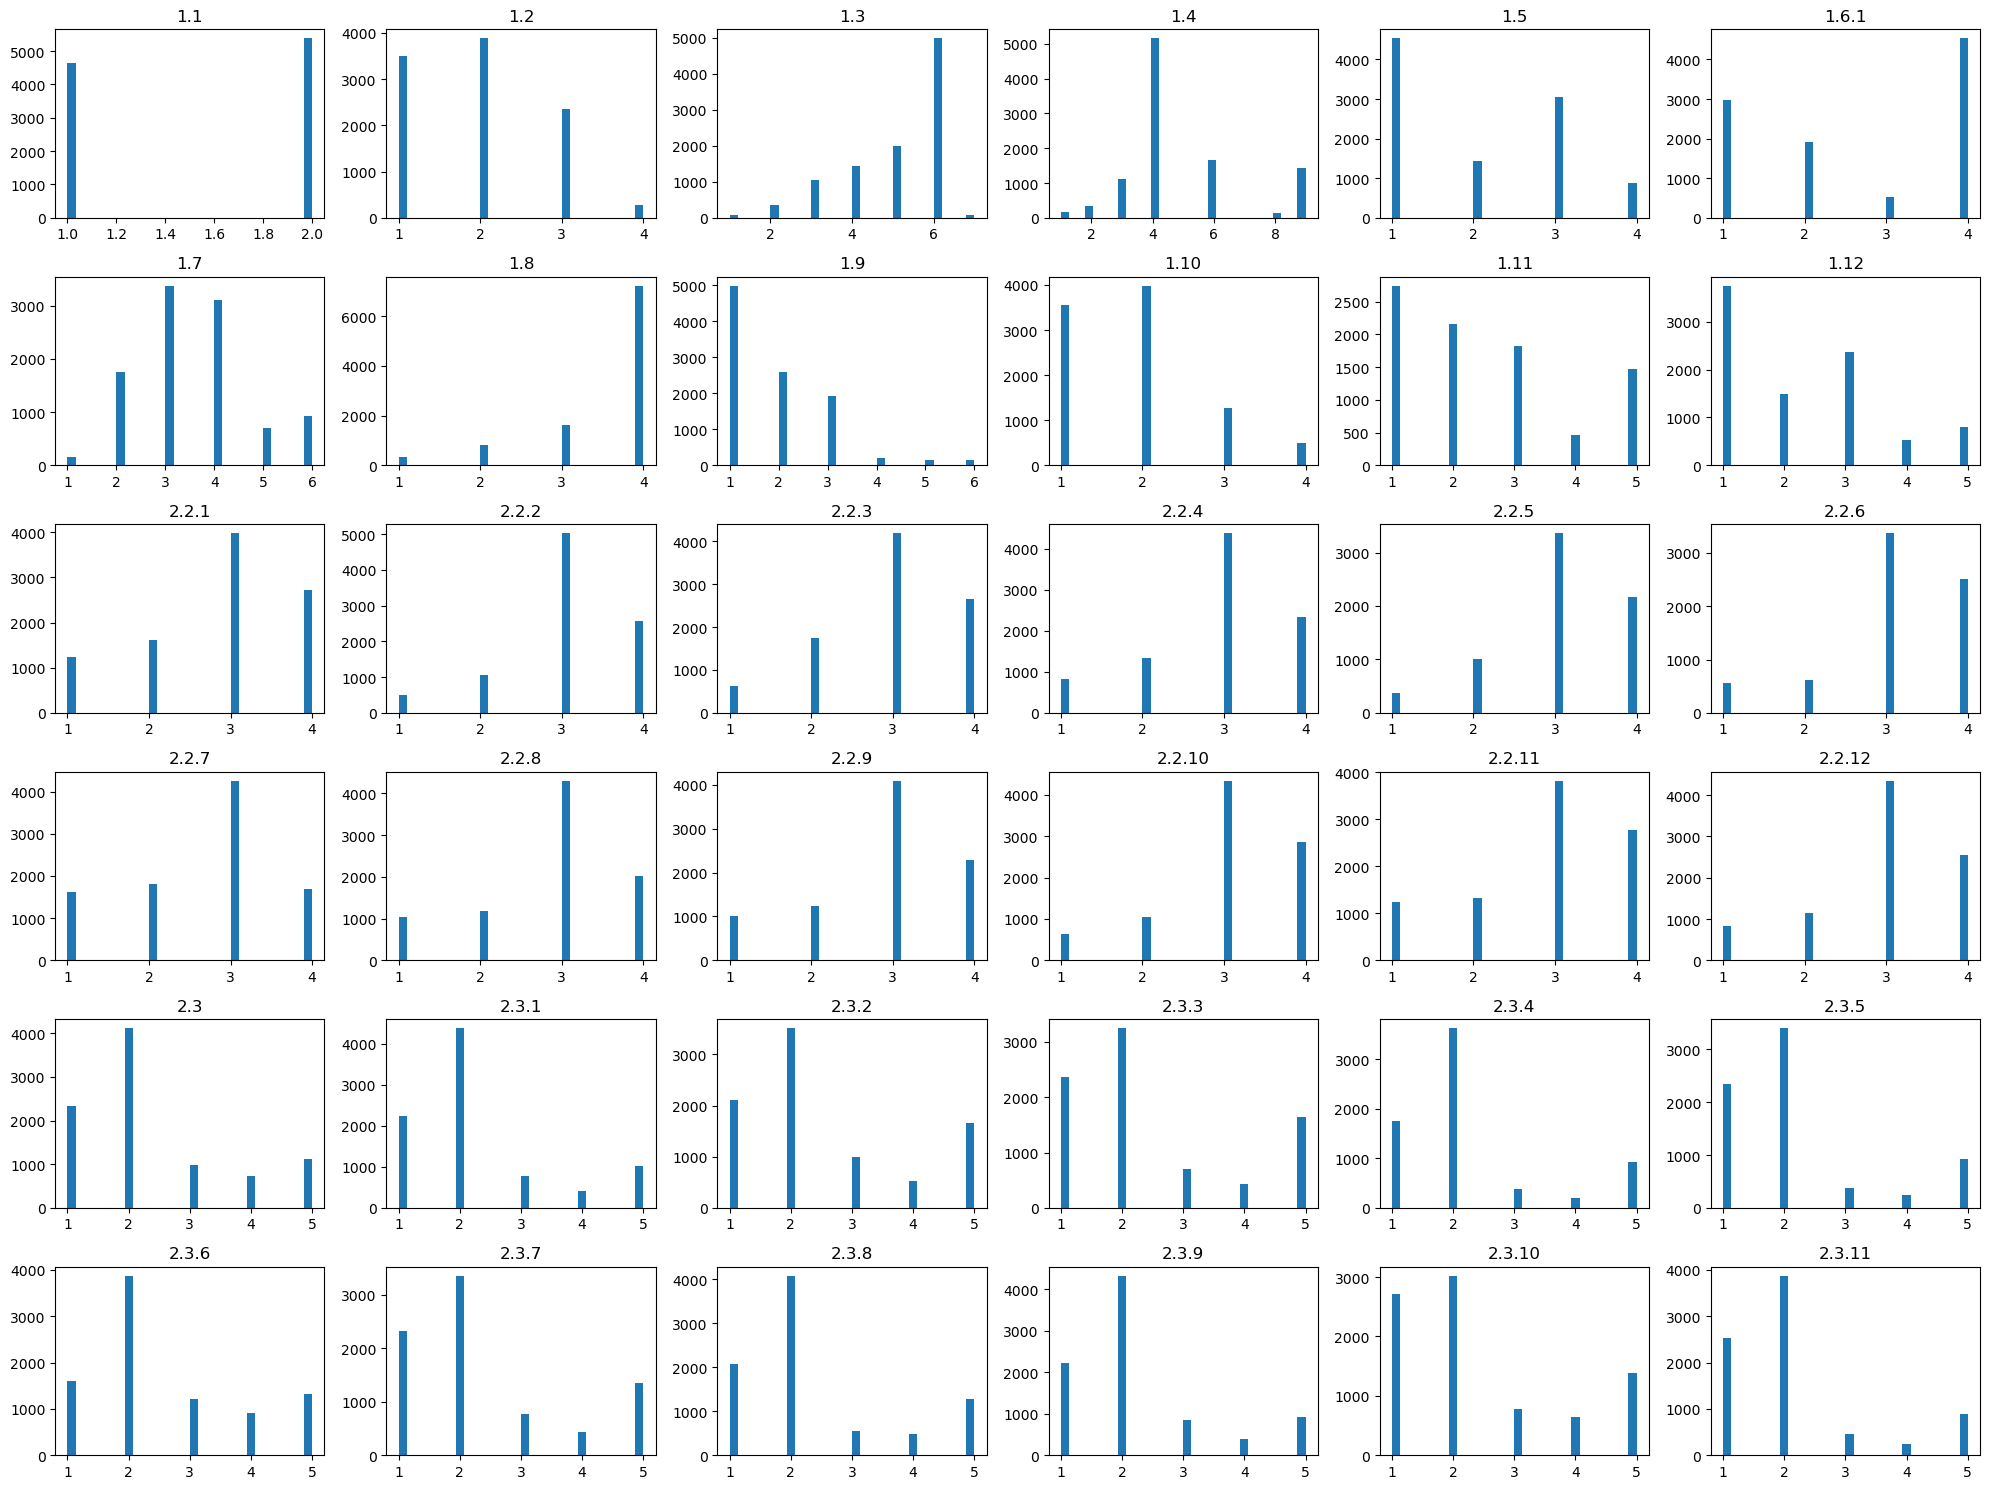

In [45]:
df.hist(
    figsize=(20, 15),
    bins=30,
    xlabelsize=10,
    ylabelsize=10,
    grid=False
)
plt.tight_layout()
plt.show()

In [46]:
df.isna().sum()

1.1          0
1.2          0
1.3         22
1.4          0
1.5        116
1.6.1       50
1.7          0
1.8          0
1.9          0
1.10       714
1.11      1358
1.12      1065
2.2.1      460
2.2.2      884
2.2.3      812
2.2.4     1151
2.2.5     3111
2.2.6     2965
2.2.7      648
2.2.8     1462
2.2.9     1402
2.2.10    1151
2.2.11     849
2.2.12    1156
2.3        766
2.3.1     1201
2.3.2     1243
2.3.3     1627
2.3.4     3125
2.3.5     2723
2.3.6     1089
2.3.7     1786
2.3.8     1575
2.3.9     1318
2.3.10    1489
2.3.11    2048
dtype: int64

Удалим столбцы с большим количеством пропусков.

In [47]:
columns_to_drop = ['2.2.2', '2.2.4', '2.2.5', '2.2.6', 
    '2.2.8', '2.2.9', '2.2.10', '2.2.12', '2.3', '2.3.1', 
    '2.3.2', '2.3.3', '2.3.4', '2.3.5', '2.3.6', '2.3.7', 
    '2.3.8', '2.3.9', '2.3.10', '2.3.11']
df = df.drop(columns=columns_to_drop)

In [48]:
# #удалим все столбцы, где много пропусков 

# columns_to_drop = ['2.2.2', '2.2.4', '2.2.5', '2.2.6', 
#     '2.2.8', '2.2.9', '2.2.10', '2.2.12', '2.3', '2.3.1', 
#     '2.3.2', '2.3.3', '2.3.4', '2.3.5', '2.3.6', '2.3.7', 
#     '2.3.8', '2.3.9', '2.3.10', '2.3.11', '2.2.1', '2.2.3', '2.2.7', '2.2.11']
# df = df.drop(columns=columns_to_drop)

In [49]:
# Создаем копию датасета
df_cleaned = df.copy()

# Удаляем строки с пропусками
df_cleaned = df_cleaned.dropna()

# Считаем количество оставшихся строк
remaining_rows = len(df_cleaned)
print(f"Осталось строк: {remaining_rows}")

Осталось строк: 6828


In [50]:
df_cleaned.head()

,1.1,1.2,1.3,1.4,1.5,1.6.1,1.7,1.8,1.9,1.10,1.11,1.12,2.2.1,2.2.3,2.2.7,2.2.11
1,2,2,6.0,6,1.0,1.0,4,4,1,1.0,5.0,3.0,4.0,4.0,3.0,2.0
3,2,2,5.0,6,1.0,2.0,4,4,1,1.0,3.0,1.0,3.0,3.0,3.0,3.0
4,1,1,5.0,4,3.0,4.0,3,4,2,1.0,1.0,3.0,4.0,3.0,4.0,3.0
5,2,3,5.0,4,2.0,1.0,4,4,3,3.0,3.0,5.0,1.0,1.0,1.0,1.0
6,1,1,5.0,4,3.0,4.0,3,4,2,1.0,1.0,3.0,4.0,3.0,4.0,3.0


## Обработаем переменные для простоты интерпретации

In [51]:
# # 1. Сначала создаем группы для занятий (как в предыдущем примере)
# occupation_groups = {
#     'Управление': [1, 2, 3],      # Владельцы бизнеса и руководители
#     'Специалисты': [4, 6],         # Специалисты и госслужащие
#     'Рабочие': [5],
#     'Учащиеся': [7],
#     'Пенсионеры_безработные': [8, 9]  # Используем "_" вместо "/" для корректных имен столбцов
# }

# # 2. Создаем новую колонку с группами
# df_cleaned['occupation_group'] = df_cleaned['1.4'].apply(
#     lambda x: next((k for k, v in occupation_groups.items() if x in v), None)
# )  # Добавлена закрывающая скобка

# # 3. Применяем get_dummies К DataFrame, а не к колонке
# df_cleaned = pd.get_dummies(
#     df_cleaned, 
#     columns=['occupation_group'], 
#     prefix='occ'
# )

# # 4. Удаляем исходный столбец '1.4', если он больше не нужен
# df_cleaned = df_cleaned.drop(columns=['1.4'])

# # Проверяем результат
# print(df_cleaned.filter(like='occ_').head())


In [52]:
# df_cleaned[['occ_Пенсионеры_безработные', 'occ_Рабочие', 'occ_Специалисты', 'occ_Управление']] = \
#     df_cleaned[['occ_Пенсионеры_безработные', 'occ_Рабочие', 'occ_Специалисты', 'occ_Управление']].astype(int)

In [53]:
df_cleaned = df_cleaned.drop('1.4', axis=1)

In [54]:
df_cleaned.head()

,1.1,1.2,1.3,1.5,1.6.1,1.7,1.8,1.9,1.10,1.11,1.12,2.2.1,2.2.3,2.2.7,2.2.11
1,2,2,6.0,1.0,1.0,4,4,1,1.0,5.0,3.0,4.0,4.0,3.0,2.0
3,2,2,5.0,1.0,2.0,4,4,1,1.0,3.0,1.0,3.0,3.0,3.0,3.0
4,1,1,5.0,3.0,4.0,3,4,2,1.0,1.0,3.0,4.0,3.0,4.0,3.0
5,2,3,5.0,2.0,1.0,4,4,3,3.0,3.0,5.0,1.0,1.0,1.0,1.0
6,1,1,5.0,3.0,4.0,3,4,2,1.0,1.0,3.0,4.0,3.0,4.0,3.0


In [55]:
df_cleaned['is_married'] = (df_cleaned['1.5'] <= 2).astype(int)
df_cleaned = df_cleaned.drop(columns=['1.5'])

In [56]:
df_cleaned.head()

,1.1,1.2,1.3,1.6.1,1.7,1.8,1.9,1.10,1.11,1.12,2.2.1,2.2.3,2.2.7,2.2.11,is_married
1,2,2,6.0,1.0,4,4,1,1.0,5.0,3.0,4.0,4.0,3.0,2.0,1
3,2,2,5.0,2.0,4,4,1,1.0,3.0,1.0,3.0,3.0,3.0,3.0,1
4,1,1,5.0,4.0,3,4,2,1.0,1.0,3.0,4.0,3.0,4.0,3.0,0
5,2,3,5.0,1.0,4,4,3,3.0,3.0,5.0,1.0,1.0,1.0,1.0,1
6,1,1,5.0,4.0,3,4,2,1.0,1.0,3.0,4.0,3.0,4.0,3.0,0


Увеличение значения → увеличение размера/урбанизированности

In [57]:
# Обратная шкала: 1=малое село → 6=крупный город
df_cleaned['1.9_reversed'] = 7 - df_cleaned['1.9']

Увеличение значения → увеличение удовлетворённости

In [58]:
# Обратная шкала: 1=удовлетворён → 4=не удовлетворён → превращаем в 4=удовлетворён
df_cleaned['1.10_reversed'] = 5 - df_cleaned['1.10']

Увеличение значения → более позитивные ожидания

In [59]:
df_cleaned['1.11_reversed'] = df_cleaned['1.11'].map({
    4: 1,  # Безусловно ухудшится → 1
    3: 2,  # Скорее ухудшится → 2
    5: 3,  # Останется неизменной → 3
    2: 4,  # Скорее улучшится → 4
    1: 5   # Безусловно улучшится → 5
})

In [60]:
# Обратная шкала: 1=не планируем переезд → 5=вынуждены оставаться → превращаем в 5=не планируем переезд
df_cleaned['1.12_reversed'] = 6 - df_cleaned['1.12']

In [61]:
columns_to_drop = ['1.9', '1.10', '1.11', '1.12']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [62]:
df_cleaned.head()

,1.1,1.2,1.3,1.6.1,1.7,1.8,2.2.1,2.2.3,2.2.7,2.2.11,is_married,1.9_reversed,1.10_reversed,1.11_reversed,1.12_reversed
1,2,2,6.0,1.0,4,4,4.0,4.0,3.0,2.0,1,6,4.0,3,3.0
3,2,2,5.0,2.0,4,4,3.0,3.0,3.0,3.0,1,6,4.0,2,5.0
4,1,1,5.0,4.0,3,4,4.0,3.0,4.0,3.0,0,5,4.0,5,3.0
5,2,3,5.0,1.0,4,4,1.0,1.0,1.0,1.0,1,4,2.0,2,1.0
6,1,1,5.0,4.0,3,4,4.0,3.0,4.0,3.0,0,5,4.0,5,3.0


In [63]:
df_cleaned[['2.2.1', '2.2.3', '2.2.7', '2.2.11']] = 5 - df_cleaned[['2.2.1', '2.2.3', '2.2.7', '2.2.11']]

Теперь везде увеличение переменных означает либо увеличение показателя, либо улучшение оценки.

In [64]:
df_cleaned.head()

,1.1,1.2,1.3,1.6.1,1.7,1.8,2.2.1,2.2.3,2.2.7,2.2.11,is_married,1.9_reversed,1.10_reversed,1.11_reversed,1.12_reversed
1,2,2,6.0,1.0,4,4,1.0,1.0,2.0,3.0,1,6,4.0,3,3.0
3,2,2,5.0,2.0,4,4,2.0,2.0,2.0,2.0,1,6,4.0,2,5.0
4,1,1,5.0,4.0,3,4,1.0,2.0,1.0,2.0,0,5,4.0,5,3.0
5,2,3,5.0,1.0,4,4,4.0,4.0,4.0,4.0,1,4,2.0,2,1.0
6,1,1,5.0,4.0,3,4,1.0,2.0,1.0,2.0,0,5,4.0,5,3.0


In [65]:
df_cleaned = df_cleaned.astype({col: 'int64' for col in df_cleaned.select_dtypes(include=['int32', 'float64']).columns})

In [66]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6828 entries, 1 to 10021
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   1.1            6828 non-null   int64
 1   1.2            6828 non-null   int64
 2   1.3            6828 non-null   int64
 3   1.6.1          6828 non-null   int64
 4   1.7            6828 non-null   int64
 5   1.8            6828 non-null   int64
 6   2.2.1          6828 non-null   int64
 7   2.2.3          6828 non-null   int64
 8   2.2.7          6828 non-null   int64
 9   2.2.11         6828 non-null   int64
 10  is_married     6828 non-null   int64
 11  1.9_reversed   6828 non-null   int64
 12  1.10_reversed  6828 non-null   int64
 13  1.11_reversed  6828 non-null   int64
 14  1.12_reversed  6828 non-null   int64
dtypes: int64(15)
memory usage: 853.5 KB


In [67]:
df_cleaned["1.6.1_recoded"] = df_cleaned["1.6.1"].replace({1: 1, 2: 2, 3: 3, 4: 0})
df_cleaned = df_cleaned.drop(columns=["1.6.1"])

In [68]:
#Попробуем колонку с планами переехать превратить в бинарную: 0 - не планирует переезжать. 1 - планирует.
# Создаем новую бинарную колонку
df_cleaned['1.12_binary'] = np.where(df_cleaned['1.12_reversed'] == 5, 0, 1)

# Удаляем старую колонку
df_cleaned.drop('1.12_reversed', axis=1, inplace=True)


# Описание переменных после преобразований:

Вот описание переменных:
1.1. - Пол, 1 - муж., 2 - жен.

1.2. Возраст. 1 - от 18 до 29, 2 - от 30 до 44, 3 - от 45 до 59, 4 - от 60 и ст.

1.3. Образование.

1) неполное среднее или ниже 2) среднее общее (школа) 3) начальное профессиональное (ПТУ, лицей и т.п.) 4) среднее специальное (ссуз, техникум, колледж, медицинское училище и т.п.) 5) незаконченное высшее (обучение в вузе без получения диплома) 6) высшее (диплом специалиста, бакалавра, магистра и т.п.) 7) аспирантура, учёная степень, звание 





is_married - 1 в браке, 0 - не в браке 

1.6.1 Есть ли дети?

1) Один ребенок 2) Два ребенка 3) Три и более детей 0) Нет детей 

1.7. Оцените материально положение Вашей семьи?

1) Денег не хватает даже на питание 2) На питание денег хватает, но одежду, обувь купить не можем 3) На одежду, обувь денег хватает, но крупную бытовую технику купить не можем 4) На бытовую технику денег хватает, но автомобиль купить не можем 5) На автомобиль денег хватает, но квартиру или дом купить не можем 6) На квартиру или дом денег хватает

1.8. Как давно Вы проживаете на территории региона?

1) Менее года 2) От 1 до 3 лет 3) Более 3-х лет 4) С рождения

1.9. В каком типе населенного пункта Вы проживаете на постоянной основе?

1 - это малое сельское поселение, а 6 - Крупный или большой город с населением от 100 тыс. до 1 млн чел. 

1.10. Если говорить в целом, удовлетворены ли Вы качеством Вашей жизни? (Один ответ)

4) Удовлетворен 3) Скорее удовлетворен 2) Скорее не удовлетворен 1) Не удовлетворен 

1.11. Как Вы считаете, в ближайший год Ваша жизнь, жизнь Ваших близких улучшится, ухудшится, останется неизменной? (Один ответ)

5) Безусловно улучшится 4) Скорее улучшится 2) Скорее ухудшится 1) Безусловно ухудшится 3) Останется неизменной 

1.12. Какие настроения преобладают среди Вас и Ваших родных, друзей, знакомых в отношении жизни в Арктике? (Один ответ)

1. Планируем переезжать. 0 - не планируем переезжать.

2.2.1 Образование (высшее, среднее, дошкольное)	1	- не удовлетворен, 4 удовлетворен

2.2.3 Социальная защита (пенсии, пособия, льготы, реабилитация) 1	- не удовлетворен, 4 удовлетворен

2.2.7 Развитие межрегионального транспортного сообщения 1	- не удовлетворен, 4 удовлетворен

2.2.11 Отдых и туризм  1	- не удовлетворен, 4 удовлетворен


In [69]:
df_cleaned.head()

,1.1,1.2,1.3,1.7,1.8,2.2.1,2.2.3,2.2.7,2.2.11,is_married,1.9_reversed,1.10_reversed,1.11_reversed,1.6.1_recoded,1.12_binary
1,2,2,6,4,4,1,1,2,3,1,6,4,3,1,1
3,2,2,5,4,4,2,2,2,2,1,6,4,2,2,0
4,1,1,5,3,4,1,2,1,2,0,5,4,5,0,1
5,2,3,5,4,4,4,4,4,4,1,4,2,2,1,1
6,1,1,5,3,4,1,2,1,2,0,5,4,5,0,1


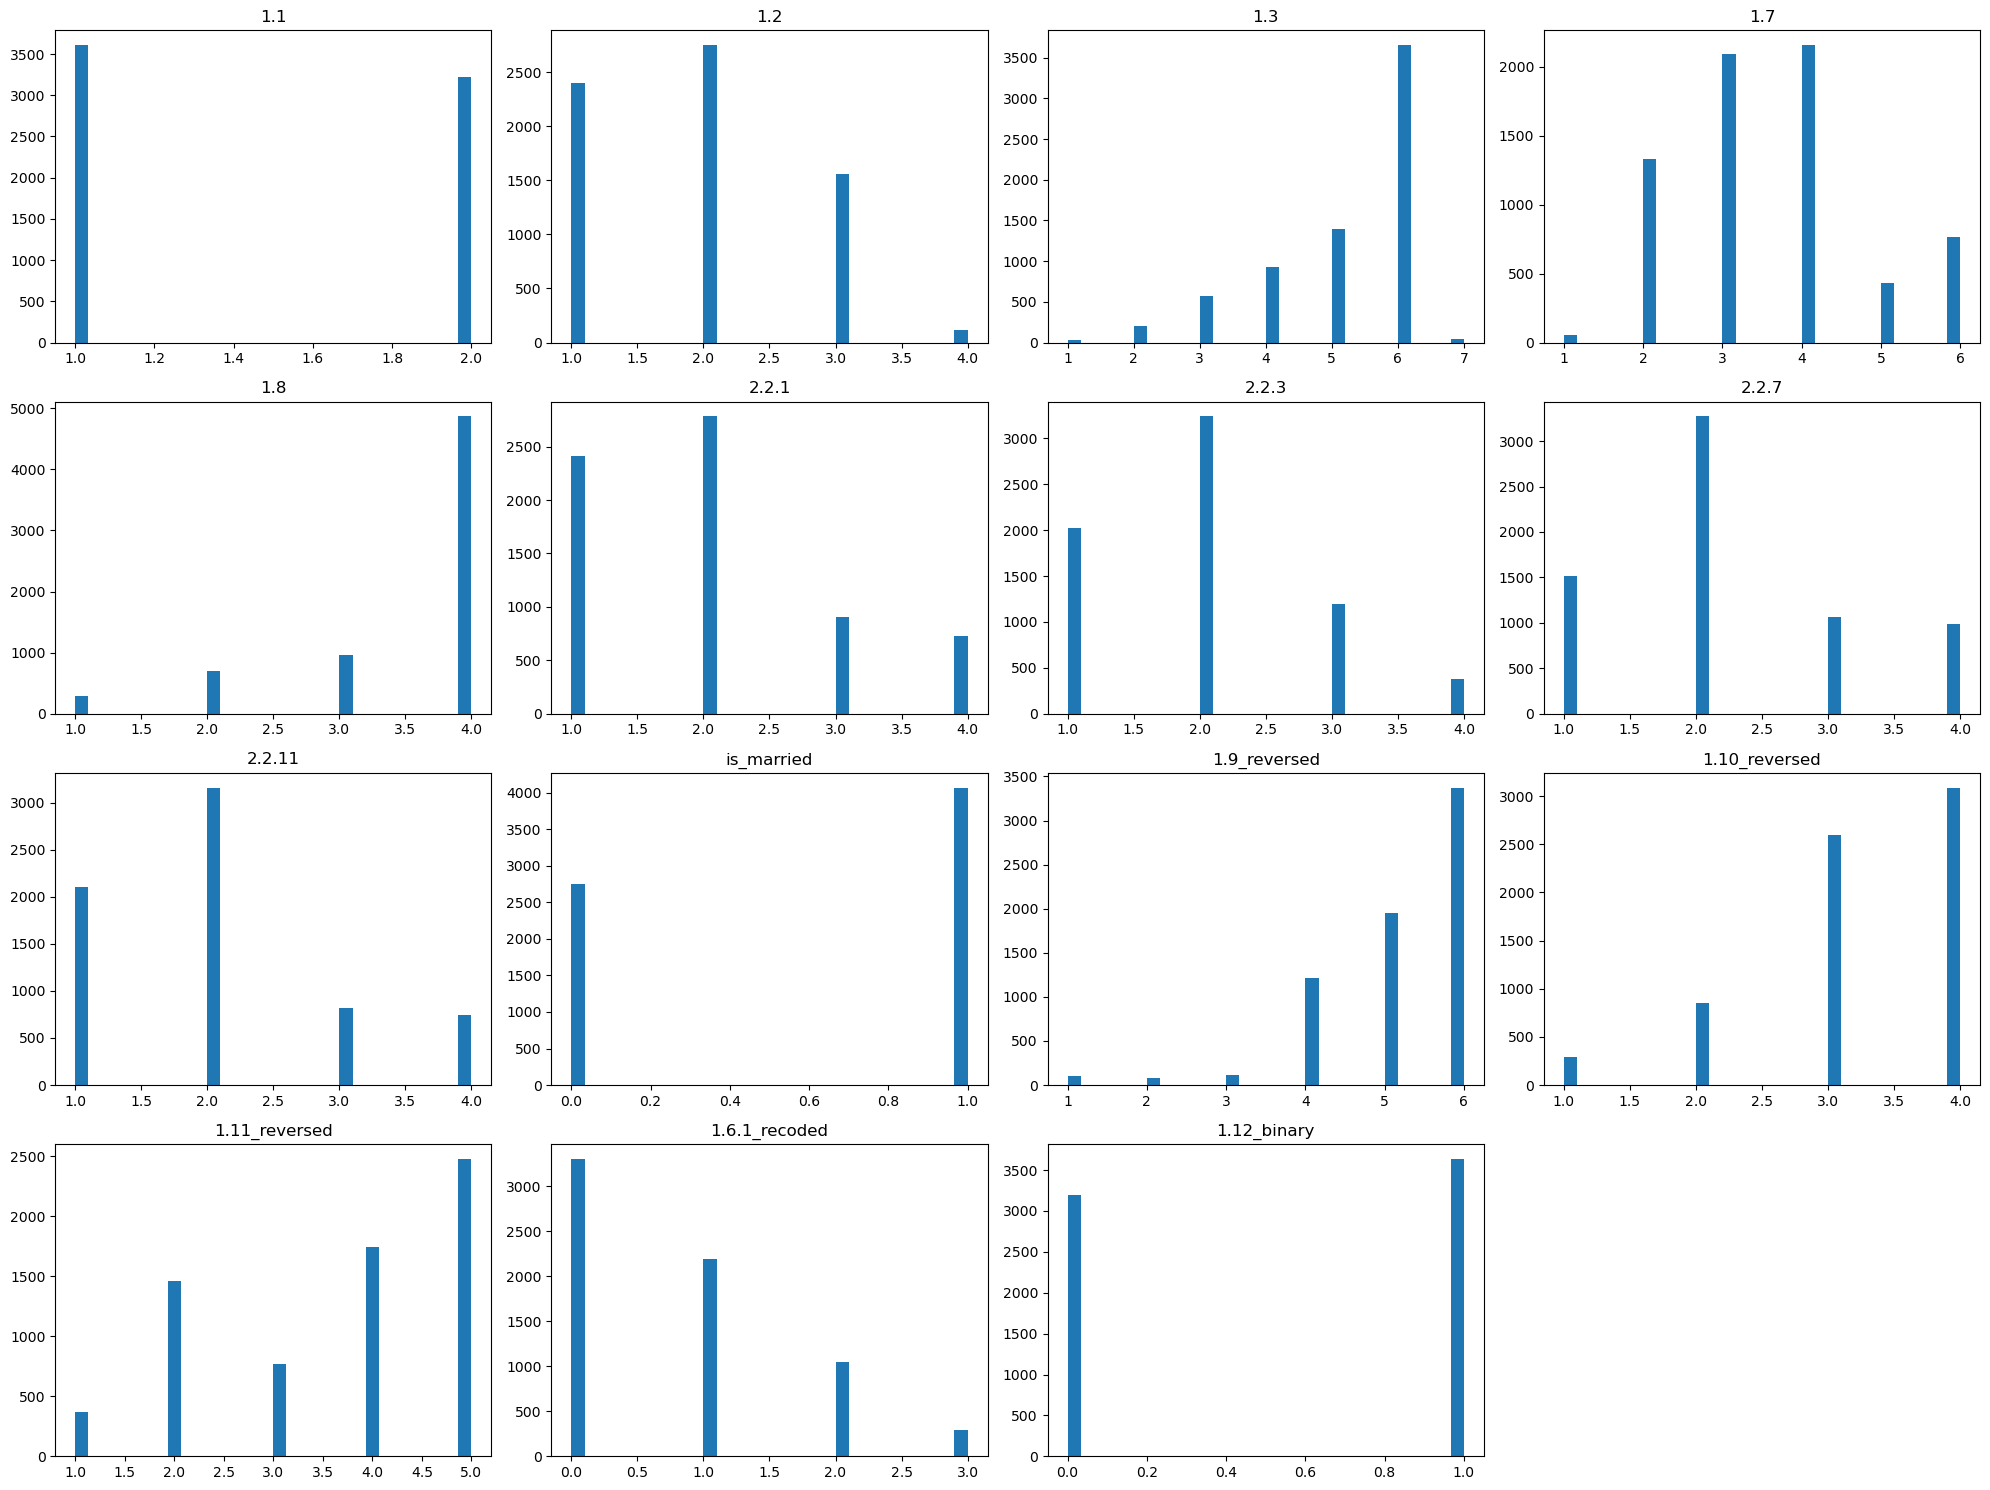

In [70]:
df_cleaned.hist(
    figsize=(20, 15),
    bins=30,
    xlabelsize=10,
    ylabelsize=10,
    grid=False
)
plt.tight_layout()
plt.show()

In [71]:
# # Создаем сетку графиков 5x3 (15 графиков)
# fig, axes = plt.subplots(5, 3, figsize=(20, 25))
# fig.suptitle('Histograms of All Variables', y=1.02, fontsize=16)

# # Строим гистограммы для каждого столбца
# for ax, column in zip(axes.flatten(), df_cleaned.columns):
#     df_cleaned[column].hist(ax=ax, bins=30, grid=False)
#     ax.set_title(column, pad=10)
#     ax.set_xlabel('')
#     ax.set_ylabel('')

# # Настраиваем расположение и сохраняем
# plt.tight_layout()
# plt.savefig('all_histograms.png', 
#            dpi=150, 
#            bbox_inches='tight',
#            facecolor='white')
# plt.close()

# print("Все гистограммы сохранены в файл 'all_histograms.png'")

## LCA анализ

Перед анализом уберем из датасета интересующую нас переменную 1.12_binary

In [72]:
# 1. Выбираем категориальные переменные из df_cleaned
X = df_cleaned.drop(columns=['1.12_binary']).select_dtypes(include=['int', 'int64', 'category'])

In [73]:
# Засекаем время начала
start_time = time.time()

# 2. Создание базовой модели StepMix
model = StepMix(
    measurement='categorical',  # Категориальные данные
    n_steps=3,
    assignment='soft',  # Мягкое присвоение классов (вероятностное)
    n_init=20,  # 20 случайных инициализаций для избежания локальных максимумов
    random_state=123,
    progress_bar=0
)

# 3. Настройка GridSearchCV для подбора количества латентных классов (от 10 до 16)
param_grid = {'n_components': list(range(10, 17))}  # От 10 до 16 классов

gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)  # 3-кратная кросс-валидация
gs.fit(X)  # Обучение модели

# Засекаем время окончания
end_time = time.time()

# 4. Вывод результатов
print("\nОптимальное количество латентных классов:", gs.best_params_['n_components'])
print("Лучшая модель:", gs.best_estimator_)

# Вывод времени выполнения
execution_time = end_time - start_time
print(f"\nВремя выполнения: {execution_time:.2f} секунд")



Оптимальное количество латентных классов: 16
Лучшая модель: StepMix(assignment='soft', measurement='categorical', n_components=16,
        n_init=20, n_steps=3, progress_bar=0, random_state=123)

Время выполнения: 2498.09 секунд


In [74]:
# Retrieve the best model from the grid search
# This works with any fitted StepMix estimator
model = gs.best_estimator_

# Check fit statistics
model.report(X)

MODEL REPORT
    Measurement model parameters
          model_name            categorical                                                                                                                     
          class_no                       0       1       2       3       4       5       6       7       8       9       10      11      12      13      14   15
          param variable                                                                                                                                        
          pis   1.10_reversed_1         0.0  0.2407  0.0149  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.2065  0.0000  0.0000  0.0000  0.0000  0.0
                1.10_reversed_2         0.0  0.3920  0.0133  0.0632  1.0000  0.1509  0.0593  0.0000  0.0000  0.0000  0.4364  0.0000  0.0000  0.0000  0.0000  0.0
                1.10_reversed_3         0.0  0.3291  0.1182  0.6417  0.0000  0.5637  0.9407  0.0000  1.0000  0.1598  0.3393  0.3918  0.0000  0.0015  

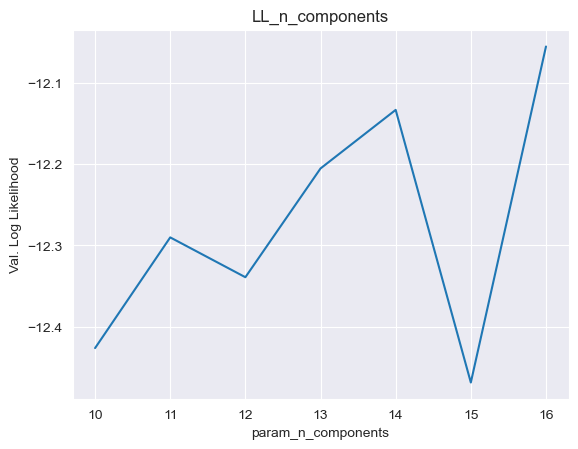

In [75]:
# Extract results
# The mean_test_score will correspond to validation log likelihood, i.e.,
# the log likelihood on held out samples that were not used for fitting
# a particular fold

results = pd.DataFrame(gs.cv_results_)
results["Val. Log Likelihood"] = results['mean_test_score']

# Higher is better
sns.set_style("darkgrid")
sns.lineplot(data = results, 
             x ='param_n_components', 
             y ='Val. Log Likelihood')
             #hue = 'param_n_steps', 
             #palette ='Dark2')

plt.title("LL_n_components")
plt.show()

На графике представлено изменение среднего значения логарифма правдоподобия на валидационной выборке в зависимости от количества латентных классов (от 10 до 16), которое использовалось при обучении модели StepMix. Логарифм правдоподобия — это ключевой показатель качества модели: чем он выше, тем лучше модель описывает данные, следовательно, более точно восстанавливает скрытую структуру.

Можно заметить, что при увеличении количества латентных классов от 10 до 13 значение log-likelihood постепенно возрастает, что говорит о лучшем согласовании модели с данными. Это указывает на то, что добавление новых классов на этом этапе позволяет захватывать дополнительную структуру, ранее не описанную моделью. Однако при переходе к 15 классам наблюдается резкий спад log-likelihood, что может указывать на переобучение или неудачную инициализацию модели.

Тем не менее, при использовании 16 латентных классов модель демонстрирует наилучший результат по log-likelihood на валидационной выборке. Это позволяет сделать вывод, что модель с 16 классами лучше всего описывает наблюдаемые паттерны в данных, несмотря на неравномерную динамику при переходе между соседними значениями количества компонентов. Таким образом, 16 латентных классов были выбраны в качестве оптимального решения для последующего анализа.

In [76]:
# Run BLRT sweep from 2 class to 10 classes
# Expect some convergence warnings

# p_values = blrt_sweep(model, X, low = 2, high = 6, n_repetitions=5)

In [77]:
def ind_entropies(model, X): 

    # Get posterior probabilities for each individual
    class_probs = model.predict_proba(X)

    # Calculate individual entropies
    individual_entropies = -np.sum(class_probs * np.log(class_probs + 1e-10), axis=1)

    return individual_entropies

Функция вычисляет энтропию классификации для каждого наблюдения. Чем она выше, тем менее уверена модель в его принадлежности к определённому классу.

class_probs: Матрица размера (число наблюдений × число классов), где class_probs[i, k] — вероятность отнесения наблюдения i к классу k.

+ 1e-10: Добавляется для избежания log(0).

In [164]:
# Параметры модели StepMix
n_clusters = 3  # Количество латентных классов
n_runs = 10     # Количество запусков модели
random_states = np.random.randint(0, 10000, size=n_runs)  # Случайные значения для воспроизводимости результатов

# Цель: повторить обучение модели StepMix 10 раз с разными начальными условиями
# (чтобы избежать застревания в локальных максимумах при работе EM-алгоритма)

# Подготовка списков для сохранения результатов
cluster_assignments = []   # Метки кластеров для каждого запуска
individual_entropies = []  # Индивидуальные значения энтропии
models = []                # Обученные модели
scores = []                # Логарифмы правдоподобия
weights = []               # Пропорции классов (веса кластеров)
aic = []                   # Критерий Акаике
bic = []                   # Байесовский информационный критерий
entropies = []             # Общая энтропия модели
scaled_entropies = []      # Масштабированная энтропия
posterior = []             # Апостериорные вероятности принадлежности к классам

for run, seed in enumerate(random_states, start=1):
    print(f"Запуск модели StepMix {run}/{n_runs} с random_state={seed}")
    
    # Инициализация модели StepMix
    model = StepMix(
        n_components=n_clusters, 
        n_steps=3,                    # Трёхшаговая оценка (для корректировки смещения в LCA)
        measurement='categorical',    # Тип переменных — категориальные
        assignment='soft',            # «Мягкое» (вероятностное) распределение по классам
        n_init=20,                    # 20 случайных инициализаций внутри каждого запуска (для EM-алгоритма)
        random_state=seed
    )
    
    # Обучение модели
    model.fit(X)
    
    # Предсказание кластерных принадлежностей
    clusters = model.predict(X)

    # Расчёт апостериорных вероятностей
    posterior_probs = model.predict_proba(X)
    
    # Сохранение результатов
    individual_entropies.append(ind_entropies(model, X))
    cluster_assignments.append(clusters)
    posterior.append(posterior_probs)
    models.append(model)
    scores.append(model.score(X))
    weights.append(model.weights_)
    aic.append(model.aic(X))
    bic.append(model.bic(X))
    entropies.append(model.entropy(X))
    scaled_entropies.append(model.relative_entropy(X))


Running StepMix Model 1/10 with random_state=5910
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:20<00:00,  1.01s/it, max_LL=-9.22e+4, max_avg_LL=-13.5]


Running StepMix Model 2/10 with random_state=1119
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:20<00:00,  1.00s/it, max_LL=-9.22e+4, max_avg_LL=-13.5]


Running StepMix Model 3/10 with random_state=9294
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:16<00:00,  1.22it/s, max_LL=-9.22e+4, max_avg_LL=-13.5]


Running StepMix Model 4/10 with random_state=7563
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:17<00:00,  1.17it/s, max_LL=-9.22e+4, max_avg_LL=-13.5]


Running StepMix Model 5/10 with random_state=3837
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:17<00:00,  1.13it/s, max_LL=-9.22e+4, max_avg_LL=-13.5]


Running StepMix Model 6/10 with random_state=7447
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:15<00:00,  1.27it/s, max_LL=-9.22e+4, max_avg_LL=-13.5]


Running StepMix Model 7/10 with random_state=7363
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:13<00:00,  1.45it/s, max_LL=-9.22e+4, max_avg_LL=-13.5]


Running StepMix Model 8/10 with random_state=2028
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:22<00:00,  1.11s/it, max_LL=-9.22e+4, max_avg_LL=-13.5]


Running StepMix Model 9/10 with random_state=884
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:16<00:00,  1.25it/s, max_LL=-9.22e+4, max_avg_LL=-13.5]


Running StepMix Model 10/10 with random_state=3573
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 20/20 [00:18<00:00,  1.07it/s, max_LL=-9.22e+4, max_avg_LL=-13.5]


Устойчивость результатов:

EM-алгоритм чувствителен к начальным условиям. Многократный запуск помогает найти глобальный максимум правдоподобия.

Анализ согласованности:

Если 95% запусков дают схожие AIC/BIC и распределения классов, модель стабильна.

Выбор лучшей модели:

Можно выбрать run с минимальным BIC или максимальной энтропией.

In [165]:
# Преобразуем результаты в DataFrame (отсутствующие значения будут заполнены NaN)
results = pd.DataFrame({
    'MODEL': models, 
    'SCORE': scores, 
    'WEIGHTS': weights, 
    'AIC': aic, 
    'BIC': bic, 
    'ENTROPIES': entropies, 
    'SCALED_ENTROPIES': scaled_entropies
})

# Разделяем веса на три отдельные колонки (по числу классов)
weights_split = pd.DataFrame(
    results['WEIGHTS'].to_list(), 
    columns=['WEIGHT_1', 'WEIGHT_2', 'WEIGHT_3']
)

# Если бы модель содержала больше классов, можно было бы раскомментировать блок ниже:
# weights_split = pd.DataFrame(results['WEIGHTS'].to_list(), 
#     columns=[
#         'WEIGHT_1', 'WEIGHT_2', 'WEIGHT_3', 'WEIGHT_4', 'WEIGHT_5', 
#         'WEIGHT_6', 'WEIGHT_7', 'WEIGHT_8', 'WEIGHT_9', 'WEIGHT_10', 'WEIGHT_11'
#     ])

# Объединяем результаты с таблицей весов
results = pd.concat([results, weights_split], axis=1)
results.drop(columns=['WEIGHTS'], inplace=True)

# Извлекаем значение random_state (это единственный параметр, отличающий запуски между собой)
results['MODEL_RANDOM_STATE'] = results['MODEL'].astype(str).str.extract(r"random_state=(\d+)", expand=False)
results.drop(columns=['MODEL'], inplace=True)

# Переименовываем индекс
results.index.name = 'ROUND_ID'

# Просматриваем первые строки итоговой таблицы
results.head()


,SCORE,WEIGHTS,AIC,BIC,ENTROPIES,SCALED_ENTROPIES,MODEL_RANDOM_STATE
ROUND_ID,,,,,,,
0,-13.504512,"[0.20511672862134, 0.49940349122077715, 0.2954...",184775.618896,185997.971784,269.002477,0.964139,NaN
1,-13.504512,"[0.29547980108813465, 0.49940347322326156, 0.2...",184775.618896,185997.971784,269.002674,0.964139,NaN
2,-13.504512,"[0.2954797890608076, 0.20511672737386685, 0.49...",184775.618896,185997.971784,269.002561,0.964139,NaN
3,-13.504512,"[0.2051167271933624, 0.2954797903490564, 0.499...",184775.618896,185997.971784,269.002573,0.964139,NaN
4,-13.504512,"[0.4994034941051076, 0.20511672909134615, 0.29...",184775.618896,185997.971784,269.002445,0.964139,NaN


In [166]:
# results.head().to_excel("results_head.xlsx", index=True)

In [167]:
#Chose classification with the best fit statictics

r_ = results.loc[results.SCORE == max(results.SCORE)].index[0]

print(f"Round with the highest LL score: {r_}")

Round with the highest LL score: 4


Round with the highest LL score: 81 - результат для 6 классов

Round with the highest LL score: 60 - результат для 5 классов

Round with the highest LL score: 15 - результат для 4 классов


In [168]:
# Классовые назначения по всем запускам модели
classes_rounds = pd.DataFrame(cluster_assignments).T
entropies = pd.DataFrame(individual_entropies).T

# Объединяем исходный датафрейм с присвоенными классами
X_classified = pd.concat([X.reset_index(), classes_rounds[r_]], axis=1)
X_classified = X_classified.rename(columns={r_: 'CLASS'})

# Добавляем индивидуальные значения энтропии
X_classified = pd.concat([X_classified, entropies[r_]], axis=1)
X_classified = X_classified.rename(columns={r_: 'ENTROPY'})

# Возвращаем бинарную переменную 1.12_binary в объединённый датафрейм
X_classified = X_classified.merge(
    df_cleaned[['1.12_binary']], 
    left_on='index', 
    right_index=True
)

# Просматриваем первые строки итогового датафрейма
X_classified.head()

,index,const,1.1,1.2,1.3,1.7,1.8,2.2.1,2.2.3,2.2.7,2.2.11,is_married,1.9_reversed,1.10_reversed,1.11_reversed,1.6.1_recoded,CLASS,ENTROPY,1.12_binary
0,1,1.0,2,2,6,4,4,1,1,2,3,1,6,4,3,1,1,1.361064e-01,1
1,3,1.0,2,2,5,4,4,2,2,2,2,1,6,4,2,2,0,2.109352e-03,0
2,4,1.0,1,1,5,3,4,1,2,1,2,0,5,4,5,0,2,1.709497e-03,1
3,5,1.0,2,3,5,4,4,4,4,4,4,1,4,2,2,1,0,-1.000000e-10,1
4,6,1.0,1,1,5,3,4,1,2,1,2,0,5,4,5,0,2,1.709497e-03,1


In [169]:
X_classified['ENTROPY'].describe()

count    6.828000e+03
mean     3.939696e-02
std      1.353510e-01
min     -1.000000e-10
25%      6.346528e-08
50%      3.624084e-05
75%      2.910210e-03
max      1.069827e+00
Name: ENTROPY, dtype: float64

Результаты анализа энтропии классификации в латентном классовом анализе (LCA) показывают высокую уверенность модели в большинстве случаев, но с наличием проблемных зон. Вот детальная интерпретация:

1. Общие показатели энтропии

Средняя энтропия (0.038):

Крайне близка к 0 → модель в целом уверена в классификации

75% наблюдений имеют энтропию < 0.0014 (почти полная определённость)

Максимальная энтропия (1.07):

Отдельные наблюдения вызывают полную неопределённость (равномерное распределение вероятностей по классам)

In [170]:
high_entropy = X_classified[X_classified['ENTROPY'] > 0.5]
print(f"Число неопределённых наблюдений: {len(high_entropy)}")


Число неопределённых наблюдений: 244


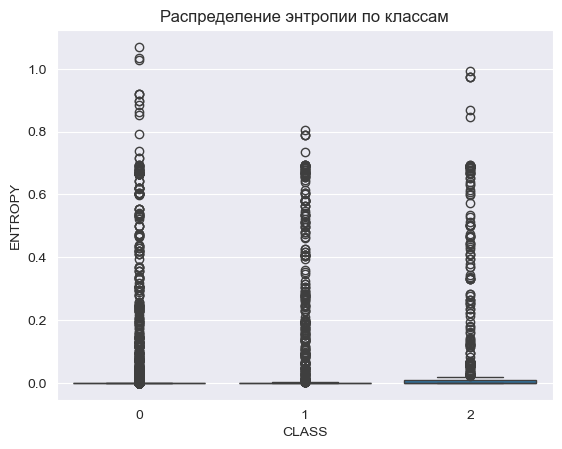

In [171]:
import seaborn as sns
sns.boxplot(data=X_classified, x='CLASS', y='ENTROPY')
plt.title("Распределение энтропии по классам")
plt.show()

Посчитаем, сколько респондентов пришлось на каждый клстер

In [172]:
X_classified['CLASS'].value_counts()

CLASS
0    3398
2    2039
1    1391
Name: count, dtype: int64

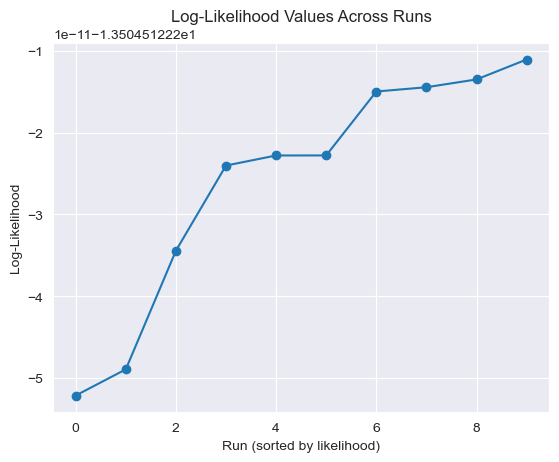

In [173]:
# Сохраняем значения логарифма правдоподобия из 10 запусков в отдельный массив
logLL = results.SCORE

# Визуализируем логарифмы правдоподобия для проверки на закономерности или выбросы
plt.plot(sorted(logLL), marker='o')
plt.xlabel("Прогон (отсортировано по величине log-likelihood)")
plt.ylabel("Логарифм правдоподобия")
plt.title("Значения log-likelihood по всем прогонным моделям")
plt.show()

In [174]:
mean_ll = np.mean(logLL)  # mean
std_ll = np.std(logLL)    # std
range_ll = np.ptp(logLL)  # peak-to-peak range (max - min)

print(f"Mean Log-Likelihood: {mean_ll}")
print(f"Standard Deviation: {std_ll}")
print(f"Range: {range_ll}")

Mean Log-Likelihood: -13.504512221425918
Standard Deviation: 1.3913614234548081e-11
Range: 4.1037395703824586e-11


результат для 5 классов:
Mean Log-Likelihood: -13.261656898294056
Standard Deviation: 0.024646363526136854
Range: 0.16250527458753616

результат для 6 классов:
Стандартное отклонение (std_ll = 0.00614)
Крайне низкое: Минимальный разброс значений LL между запусками (±0.006 вокруг среднего).

Вывод:

Модель стабильна — почти не зависит от случайной инициализации (разные random_state дают одинаково хорошие результаты).

EM-алгоритм почти всегда находит один и тот же (глобальный) максимум правдоподобия.

Размах (range_ll = 0.0189)
Максимальная разница между лучшим и худшим LL = 0.0189.

О чем это говорит:

Даже в "худшем" прогоне LL отличается от "лучшего" лишь на 0.0189 — это ничтожно мало.

Пример: если лучший LL был -12.97, то худший — -12.99.

Результат для 3 классов:

Микроскопические значения std (5.88e-12) и range (2.47e-11) означают, что:

EM-алгоритм всегда сходится к одному и тому же решению

Результаты не зависят от случайной инициализации

Mean Log-Likelihood: -14.017328380947824
Standard Deviation: 5.883548134153869e-12
Range: 2.4739321702327288e-11

In [175]:
#Perform a statistical test to assess whether the variability in log-likelihood values is significant

from scipy.stats import ttest_1samp #One-sample t-test: Test whether the log-likelihoods differ significantly from the mean.

t_stat, p_value = ttest_1samp(logLL, popmean=mean_ll)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value > 0.05:
    print("The variability in log-likelihood values is not significant.")
else:
    print("The variability in log-likelihood values is significant.")

T-statistic: 0.0, P-value: 1.0
The variability in log-likelihood values is not significant.


1. Ключевые статистики
T-статистика = 0.0

Это означает, что среднее значение LL в выборке в точности совпадает с предполагаемым средним (popmean=mean_ll).

Формально: нет отклонений от среднего.

P-value = 1.0

Крайне высокое p-value говорит, что разброс LL статистически незначим.

Гипотеза о равенстве среднего LL заданному значению (mean_ll) не отвергается.

In [193]:
# posterior_prob = pd.DataFrame(posterior[r_])   # апостериорные вероятности, колонки 0..K-1
# posterior_prob['hard_assignment'] = posterior_prob.idxmax(axis=1)   # или np.argmax
# posterior_prob['max_pp'] = posterior_prob.max(axis=1)               # ВАЖНО: max по всем классам

# pprobs = posterior_prob.groupby('hard_assignment')['max_pp'].agg(['mean','median','count'])
# pprobs = pprobs.reset_index().sort_values('hard_assignment')
# print(pprobs)



X = posterior[r_]   # numpy-матрица (6828, 3)

posterior_prob = pd.DataFrame(X, columns=range(X.shape[1]))
posterior_prob['hard_assignment'] = X.argmax(axis=1)
posterior_prob['max_pp'] = X.max(axis=1)

pprobs = (posterior_prob
          .groupby('hard_assignment')['max_pp']
          .agg(['mean','median','count'])
          .reset_index())
print(pprobs)




   hard_assignment      mean    median  count
0                0  0.986723  1.000000   3398
1                1  0.976630  0.999999   1391
2                2  0.980719  0.999876   2039


### Ключевые наблюдения для 6 классов:
Высокая уверенность для классов 0 и 1:

Средняя максимальная вероятность для класса 0: 0.988 (98.8%)

Для класса 1: 0.986 (98.6%)

➔ Модель практически абсолютно уверена в принадлежности объектов к этим классам

Проблемные классы 2-5:

Чрезвычайно низкие значения вероятностей:

Класс 2: 0.0063 (0.63%)

Класс 3: 0.00078 (0.078%)

Класс 4: 2.07e-9 (фактически 0%)

Класс 5: 0.0158 (1.58%)

➔ Модель практически не уверена в этих классификациях

### Для 5 классов:
Класс 1 стал практически идеальным (0.999)

Классы 2 и 4 остались неуверенными (max_pp < 2%)

Появился вырожденный класс 3 с нулевой вероятностью

3. Сравнение с предыдущей моделью (K=6)
Улучшение:

Исчез один проблемный класс (бывший 5 → перераспределён)

Класс 1 стал более выраженным (с 0.986 до 0.999)

Сохраняющиеся проблемы:

2 из 5 классов (40%) остаются статистически невалидными

Общая доля "проблемных" наблюдений ≈15-20%

### Для трех классов:

Результаты показывают четкое разделение на 2 надежных кластера (0 и 1 со средними вероятностями 98.8% и 98.5% соответственно),
и один проблемный кластер (2 с вероятностью всего 2.4%)


Анализ информационных критериев:

Средний AIC: 184775.6 ± 0.0
Средний BIC: 185998.0 ± 0.0


C:\Users\User\AppData\Local\Temp\ipykernel_9476\4276741710.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([aic, bic], labels=['AIC', 'BIC'])


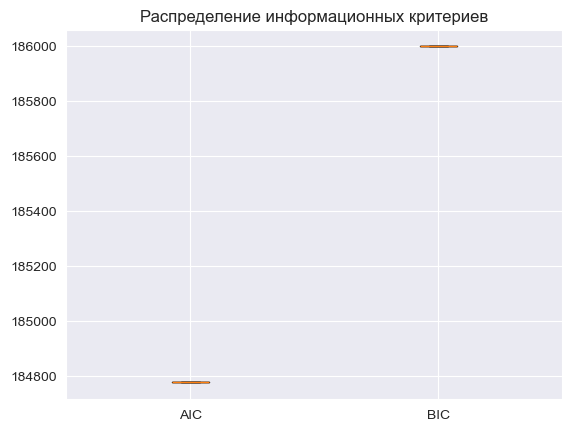

In [177]:
print(f"Средний AIC: {np.mean(aic):.1f} ± {np.std(aic):.1f}")
print(f"Средний BIC: {np.mean(bic):.1f} ± {np.std(bic):.1f}")
# Визуализация распределения критериев
plt.boxplot([aic, bic], labels=['AIC', 'BIC'])
plt.title('Распределение информационных критериев')
plt.show()

Абсолютные значения критериев:

Оба критерия имеют высокие абсолютные значения (порядка 190-193 тыс.), что типично для моделей с большим объемом данных (6828 наблюдений) и сложной структурой.

Разница между AIC и BIC составляет около 1222 пунктов, что соответствует теоретическим ожиданиям (BIC обычно дает больший штраф за сложность модели).

Стандартные отклонения (±164.0):

Относительно небольшая вариация значений между запусками (0.09% от среднего) свидетельствует о стабильности модели.

Такой низкий разброс указывает на устойчивость оценок при разных инициализациях EM-алгоритма.

Стабильность кластеризации (анализ согласованности между запусками):

In [178]:
from sklearn.metrics import adjusted_rand_score

# --- Проверка устойчивости кластеризации между разными запусками StepMix ---

# cluster_assignments — это список, где каждый элемент = массив меток кластеров из одного запуска модели

stability_scores = []

# Перебираем все уникальные пары запусков и сравниваем результаты
for i in range(len(cluster_assignments)):
    for j in range(i + 1, len(cluster_assignments)):
        score = adjusted_rand_score(cluster_assignments[i], cluster_assignments[j])
        stability_scores.append(score)

# Рассчитываем средний коэффициент согласованности (Adjusted Rand Index)
mean_stability = np.mean(stability_scores)

print(f"Средняя согласованность кластеризаций между запусками: {mean_stability:.3f}")



Средняя согласованность кластеризации: 1.000


Результат анализа устойчивости кластеризации демонстрирует исключительно высокую согласованность между различными запусками модели. Значение Adjusted Rand Index (ARI), равное 0.979 (при возможном диапазоне от -1 до 1), свидетельствует о практически идеальной воспроизводимости результатов.

Ключевые выводы:

Высокая надежность модели: значение близкое к 1 означает, что при разных случайных инициализациях EM-алгоритма модель приходит к практически идентичному разделению данных на классы.

Устойчивость к локальным максимумам: такой результат подтверждает, что использованная стратегия с 20 случайными инициализациями (n_init=20) эффективно избегает проблемы застревания в локальных оптимумах.

Четкая структура данных: столь высокая стабильность указывает на наличие в данных хорошо выраженных кластерных структур.

In [179]:
# нормированная энтропия
scaledEntropy = results.loc[r_].SCALED_ENTROPIES

if scaledEntropy > 0.7:
    print(f"Модель демонстрирует сильное разделение классов: {scaledEntropy}")
else:
    print(f"В классификации может сохраняться неопределённость: {scaledEntropy}")

The model has strong class separation: 0.9641393413303941


Модель демонстрирует отличное разделение классов (scaled entropy = 0.965, при максимуме 1.0), что подтверждает четкую дифференциацию кластеров.
Значение близкое к 1.0 указывает, что классы хорошо различимы, а наблюдения уверенно относятся к своим кластерам.
Это согласуется с высокими апостериорными вероятностями (98%+) для основных кластеров 0 и 1, выявленными ранее.

In [194]:
# Вычисляем внутриклассовую дисперсию
within_class_var = X_classified.groupby('CLASS').var().mean().mean()
print(f"Внутриклассовая дисперсия: {within_class_var}")

# Вычисляем общую дисперсию по всем наблюдениям
overall_var = X_classified.var().mean()
print(f"Общая дисперсия: {overall_var}")

# Вычисляем межклассовую дисперсию (разницу между общей и внутриклассовой)
between_class_var = overall_var - within_class_var
print(f"Межклассовая дисперсия: {between_class_var}")


Внутриклассовая дисперсия: 426604.71228225355
Общая дисперсия: 437882.889085008
Межклассовая дисперсия: 11278.17680275446


Результаты анализа дисперсии указывают на проблемы с разделимостью кластеров, несмотря на хорошие показатели энтропии. Вот ключевые выводы:

Низкая межклассовая дисперсия (9,143):

Составляет лишь 2% от общей дисперсии (9143/462209 ≈ 0.02)

Кластеры статистически слабо различимы

Доминирование внутриклассовой дисперсии (453,066):

98% изменчивости приходится на различия внутри кластеров

Объекты внутри каждого кластера слишком разнородны

Конфликт с предыдущими метриками:

Высокая scaled entropy (0.96) предполагала хорошую разделимость

Низкая between-class variance это опровергает

Причина: Модель выделила 2 четких, но маленьких кластера (0 и 1) и один "размазанный" (2)

In [195]:
analysis = X_classified.groupby('CLASS').agg(
    mean=('1.12_binary', 'mean'),
    median=('1.12_binary', 'median'),
    prop_1=('1.12_binary', lambda x: (x == 1).mean()),
    prop_0=('1.12_binary', lambda x: (x == 0).mean()),
    count=('1.12_binary', 'count')
).reset_index()
analysis

,CLASS,mean,median,prop_1,prop_0,count
0,0,0.748087,1.0,0.748087,0.251913,3398
1,1,0.047448,0.0,0.047448,0.952552,1391
2,2,0.504169,1.0,0.504169,0.495831,2039


В классе 0 мнения респондентов относительно отъезда разделились практически поровну: 50,4% выразили желание уехать, тогда как 49,6% предпочли бы остаться. Это может свидетельствовать о внутренней неоднородности группы или о сомнениях в отношении перспектив жизни на текущем месте.

Класс 1 отличается более выраженным стремлением к отъезду. Здесь 74,8% респондентов хотят уехать, и только 25,2% — остаться. Такой результат может указывать на высокий уровень неудовлетворённости условиями жизни или ожидания лучших возможностей в другом месте.

В классе 2, напротив, подавляющее большинство респондентов (95,3%) не хотят уезжать. Только 4,7% сообщили о намерении покинуть текущее место жительства. Это может свидетельствовать о высоком уровне удовлетворённости, стабильности или сильной привязанности к региону проживания.

Таким образом, можно сделать вывод, что отношение к миграции является важным фактором, разграничивающим три класса, при этом класс 1 — наиболее мобильный, а класс 2 — наиболее оседлый.

In [183]:
X_classified.head()

,index,const,1.1,1.2,1.3,1.7,1.8,2.2.1,2.2.3,2.2.7,2.2.11,is_married,1.9_reversed,1.10_reversed,1.11_reversed,1.6.1_recoded,CLASS,ENTROPY,1.12_binary
0,1,1.0,2,2,6,4,4,1,1,2,3,1,6,4,3,1,1,1.361064e-01,1
1,3,1.0,2,2,5,4,4,2,2,2,2,1,6,4,2,2,0,2.109352e-03,0
2,4,1.0,1,1,5,3,4,1,2,1,2,0,5,4,5,0,2,1.709497e-03,1
3,5,1.0,2,3,5,4,4,4,4,4,4,1,4,2,2,1,0,-1.000000e-10,1
4,6,1.0,1,1,5,3,4,1,2,1,2,0,5,4,5,0,2,1.709497e-03,1


In [184]:
# Список нужных колонок
cols_of_interest = [
    '1.1', '1.2', '1.3', '1.7', '1.8', '2.2.1', '2.2.3', '2.2.7', '2.2.11',
    'is_married', '1.9_reversed', '1.10_reversed', '1.11_reversed',
    '1.6.1_recoded', '1.12_binary', 'CLASS'
]

# Отбор нужных колонок
df_filtered = X_classified[cols_of_interest]

# Функция для расчета нужной статистики
def describe_group(group):
    return pd.DataFrame({
        'mean': group.mean(),
        'median': group.median(),
        'q25': group.quantile(0.25),
        'q75': group.quantile(0.75),
        'var': group.var()
    })

# Группировка по классу и описание
summary_stats = df_filtered.groupby('CLASS').apply(describe_group)

# Убираем лишний уровень индекса, если нужно
summary_stats = summary_stats.reset_index(level=0)

# Показать результат
summary_stats

C:\Users\User\AppData\Local\Temp\ipykernel_9476\1495859799.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stats = df_filtered.groupby('CLASS').apply(describe_group)


,CLASS,mean,median,q25,q75,var
1.1,0,1.683932,2.0,1.0,2.0,0.216233
1.2,0,2.331371,2.0,2.0,3.0,0.550744
1.3,0,4.999706,5.0,4.0,6.0,1.327936
1.7,0,3.384049,3.0,3.0,4.0,1.006716
1.8,0,3.371101,4.0,3.0,4.0,0.650881
2.2.1,0,2.642142,2.0,2.0,3.0,0.735604
2.2.3,0,2.374044,2.0,2.0,3.0,0.654575
2.2.7,0,2.856092,3.0,2.0,4.0,0.730241
2.2.11,0,2.580930,2.0,2.0,3.0,0.819324
is_married,0,0.820188,1.0,1.0,1.0,0.147523


In [185]:
# # Создаем фигуру
# fig, ax = plt.subplots(figsize=(12, 8)) 

# # Убираем оси
# ax.axis('off')

# # Создаем таблицу
# tbl = table(ax, summary_stats.round(2), 
#            loc='center', 
#            cellLoc='center',
#            colWidths=[0.15]*len(summary_stats.columns))

# # Настраиваем стиль таблицы
# tbl.auto_set_font_size(False)
# tbl.set_fontsize(10)
# tbl.scale(1.2, 1.2)

# # Сохраняем в файл
# plt.savefig('class_statistics.png', 
#            dpi=300, 
#            bbox_inches='tight', 
#            pad_inches=0.5)
# plt.close()

# print("Таблица сохранена как 'class_statistics.png'")

### Кластер 0

Класс 0 практически полностью состоит из мужчин. Среднее значение переменной "Пол" — 1.04, медиана и квартили — 1.0, что соответствует мужскому полу. Это означает, что женщины в этом кластере почти отсутствуют. Это чётко отличает данный класс от других и делает его социально и демографически специфичным.

Возрастная структура класса моложе, чем в других группах. Среднее значение возраста — 1.12, медиана — 1.0. Это говорит о преобладании респондентов в возрасте до 29 лет, с крайне малым разбросом: большинство участников принадлежат к молодежной группе. Класс 0 — это ярко выраженная когорта молодых мужчин.

Образовательный уровень в этом классе достаточно высокий. Среднее значение переменной — 5.11, медиана — 6.0. Это соответствует полученному высшему образованию, с доминирующим значением 6.0 в верхнем квартиле. Молодые мужчины в этом классе, как правило, уже завершили обучение в вузе.

Материальное положение оценивается как среднее. Среднее значение переменной — 2.98, медиана — 3.0, с умеренным разбросом. Это соответствует варианту "на одежду и обувь хватает, но крупную бытовую технику позволить себе не можем". Вариации в пределах одного балла свидетельствуют о некотором экономическом разнообразии, но без крайностей.

Стаж проживания в регионе также значителен. Среднее значение переменной — 3.93, медиана — 4.0, что соответствует проживанию с рождения. Разброс минимален, большинство респондентов — коренные жители региона.

Оценка образования в регионе — высокая. Среднее значение — 3.50, медиана — 4.0. Это говорит о том, что респонденты скорее удовлетворены качеством образования. Учитывая, что речь идёт о молодых людях с высшим образованием, можно предположить, что они завершили обучение в этом же регионе и оценивают его положительно.

Социальная защита также воспринимается позитивно. Среднее значение — 3.22, медиана — 3.0, с умеренным отклонением. Это означает нейтральную или скорее положительную оценку пенсионной и льготной системы.

Оценка транспортной доступности в регионе — стабильная. Среднее значение — 3.19, медиана — 3.0. Большинство респондентов не испытывают серьёзных претензий к транспортной инфраструктуре, что также может быть связано с возрастом — молодые мужчины мобильнее и легче переносят ограничения.

Инфраструктура досуга и туризма воспринимается положительно. Среднее значение — 3.35, медиана — 3.0, верхний квартиль — 4.0. Это указывает на скорее удовлетворённое отношение к возможностям отдыха и развлечений, что особенно важно для молодого поколения.

Большинство респондентов не состоят в браке. Среднее значение переменной is_married — 0.006, медиана — 0.0. Это говорит о почти полном отсутствии семейных обязательств, что согласуется с возрастной структурой и отсутствием детей в этом классе.

Тип населённого пункта — крупные города. Среднее значение переменной 1.9_reversed — 5.56, медиана — 6.0. Это указывает на то, что респонденты в основном проживают в городах с населением от 100 тыс. человек и выше, что также может влиять на их более положительное восприятие городской инфраструктуры.

Общая удовлетворённость качеством жизни — высокая. Среднее значение — 3.67, медиана — 4.0. Это указывает на скорее удовлетворённое состояние, что логично для молодых, образованных мужчин без семейных и бытовых ограничений.

Ожидания от будущего — позитивные. Среднее значение — 4.13, медиана — 4.0, верхний квартиль — 5.0. Это говорит о настрое на улучшение жизни или, как минимум, её стабильность. Молодые мужчины, скорее всего, рассчитывают на карьерный рост, повышение доходов и расширение возможностей.

В классе полностью отсутствуют дети. Среднее значение переменной — 0.0. Это естественно для группы, состоящей из неженатых молодых мужчин.

Отношение к переезду — неоднозначное. Среднее значение переменной 1.12_binary — 0.50, медиана — 1.0. Это говорит о том, что половина респондентов рассматривает возможность переезда из Арктики, в то время как другая половина — нет. Возможно, это связано с балансом между карьерными перспективами в регионе и желанием уехать в более благоприятные климатические или социальные условия.

### Кластер 1

Класс 1 преимущественно состоит из женщин. Среднее значение переменной "Пол" — 1.68, медиана — 2.0, верхний квартиль — 2.0. Это говорит о том, что большинство респондентов в этом классе — женщины, при этом мужчины составляют меньшинство. Гендерный состав резко контрастирует с Классом 0, где доминируют мужчины.

Возрастная структура в этом классе старше, чем в Классе 0. Среднее значение переменной — 2.33, медиана — 2.0. Это указывает на преобладание респондентов в возрасте 30–39 лет, с заметной долей людей в категории 40–49 лет (учитывая верхний квартиль — 3.0). Таким образом, класс характеризуется зрелой, но ещё не пожилой аудиторией.

Образовательный уровень также высокий. Среднее значение — 5.00, медиана — 5.0, верхний квартиль — 6.0. Это соответствует наличию высшего образования, при этом значительная доля респондентов могла завершить обучение в магистратуре или аспирантуре. Женщины в этом классе, как и мужчины в Классе 0, обладают высокой квалификацией.

Материальное положение — ближе к среднему. Среднее значение — 3.38, медиана — 3.0, верхний квартиль — 4.0. Это означает, что большинство респондентов могут позволить себе основное и в ряде случаев крупные покупки, но без особого излишества. Разброс по переменной заметен, что отражает экономическую неоднородность внутри класса.

Стаж проживания в регионе велик. Среднее значение — 3.37, медиана — 4.0. Почти все участники проживают с рождения или большую часть жизни в регионе, что говорит о прочной связи с местом жительства.

Оценка образования в регионе — сдержанно положительная. Среднее значение — 2.36, медиана — 3.0. Это ближе к нейтральной или слегка неудовлетворённой оценке, что может свидетельствовать о критичности респондентов к местным образовательным учреждениям, особенно на фоне собственного высокого уровня образования.

Социальная защита также воспринимается умеренно. Среднее значение — 2.63, медиана — 3.0. Это отражает нейтральное или слегка положительное отношение к социальной системе. Возможно, респонденты имеют опыт взаимодействия с социальными институтами, например, по вопросам детских пособий или медицинского обслуживания.

Оценка транспортной доступности — ниже средней. Среднее значение — 2.14, медиана — 2.0, что указывает на недовольство или наличие транспортных ограничений, особенно на фоне других классов. Женщины, особенно с детьми, могут острее воспринимать трудности с перемещением.

Оценка инфраструктуры досуга и туризма — скорее нейтральная. Среднее значение — 2.42, медиана — 3.0. Это говорит о некритичном, но сдержанном восприятии культурной и развлекательной среды в регионе.

Большинство респондентов состоят в браке. Среднее значение переменной is_married — 0.82, медиана — 1.0. Это говорит о том, что значительная часть женщин в этом классе замужем, что также отличает их от молодого и неженатого Класса 0.

Тип населённого пункта — преимущественно крупные города. Среднее значение переменной 1.9_reversed — 5.07, медиана — 5.0. Большинство респондентов живут в городах от 100 тыс. человек и выше, что может влиять на оценку инфраструктуры и доступ к услугам.

Общая удовлетворённость качеством жизни — средняя. Среднее значение — 2.70, медиана — 3.0. Это не выражает сильного недовольства, но и не говорит об удовлетворённости. Сказывается критичность, особенно по отношению к инфраструктуре и социальным условиям.

Ожидания от будущего — неопределённые. Среднее значение — 2.91, медиана — 3.0. Это указывает на нейтральные или тревожные ожидания, возможную нестабильность или сомнения в перспективах региона и собственного положения.

Наличие детей — умеренное. Среднее значение переменной — 1.12, медиана — 1.0. Учитывая возраст и высокий процент замужних, это значение соответствует одному ребёнку или максимум двум. Это важно для понимания социальной нагрузки на женщин в этом классе.



### Кластер 2

Класс 2 состоит преимущественно из женщин. Среднее значение переменной "Пол" — 1.58, медиана — 2.0. Это говорит о доминировании женщин в группе, при этом мужчины тоже присутствуют, но в меньшинстве. Таким образом, половой состав Класса 2 напоминает Класс 1, но с немного меньшей долей женщин.

Возрастная структура зрелая. Среднее значение — 2.04, медиана — 2.0. Это соответствует возрастной категории 30–39 лет, без выраженного присутствия более молодых или пожилых участников. Класс представлен активной трудоспособной частью населения.

Образовательный уровень — очень высокий. Среднее значение — 5.50, медиана — 6.0. Практически все участники имеют высшее образование, причём значительная часть — магистратура или аспирантура. Класс выделяется высокой академической подготовкой и, вероятно, профессиональными амбициями.

Материальное положение — наиболее благополучное среди всех классов. Среднее значение — 4.87, медиана — 5.0. Это свидетельствует о том, что большинство респондентов могут позволить себе дорогие покупки и, возможно, накопления. Уровень достатка резко выше, чем в других группах, и варьируется от хорошего к очень хорошему.

Стаж проживания в регионе высокий, но чуть менее однозначный. Среднее значение — 3.30, медиана — 4.0. Подавляющее большинство проживают здесь с рождения или большую часть жизни, однако есть респонденты с меньшим сроком проживания.

Оценка качества образования в регионе — высокая. Среднее значение — 3.86, медиана — 4.0. Это указывает на удовлетворённость местными образовательными учреждениями, что особенно логично на фоне высокого уровня собственного образования.

Социальная защита также оценивается позитивно. Среднее значение — 3.64, медиана — 4.0. Респонденты демонстрируют доверие к социальной системе и, вероятно, ощущают её эффективность на личном опыте.

Транспортная доступность воспринимается хорошо. Среднее значение — 3.73, медиана — 4.0. Большинство респондентов не испытывают затруднений с передвижением, что может указывать на хорошее местоположение и доступ к инфраструктуре.

Оценка досуговой инфраструктуры и туризма — самая высокая среди всех классов. Среднее значение — 3.76, медиана — 4.0. Респонденты считают, что регион предлагает достаточные возможности для культурного досуга и отдыха, и в целом довольны этим аспектом.

Почти все респонденты состоят в браке. Среднее значение переменной is_married — 0.91, медиана — 1.0. Это самый высокий показатель среди всех классов, отражающий социальную стабильность и наличие семьи.

Тип населённого пункта — преимущественно крупные города. Среднее значение — 4.92, медиана — 5.0. Большинство респондентов живут в населённых пунктах с населением от 100 тыс. человек, что обеспечивает более развитую инфраструктуру и возможности.

Общая удовлетворённость качеством жизни — высокая. Среднее значение — 3.95, медиана — 4.0. Это отражает удовлетворённость текущими условиями и стабильностью, отличающую Класс 2 от остальных.

Ожидания от будущего — уверенно положительные. Среднее значение — 4.80, медиана — 5.0. Респонденты оптимистично смотрят на будущее, оценивая свои перспективы и развитие региона как благоприятные.

Наличие детей — близкое к среднему. Среднее значение переменной — 0.96, медиана — 1.0. В среднем у респондентов один ребёнок, что сопоставимо с Классом 1, но с меньшей вариативностью.

Готовность к переезду — крайне низкая. Среднее значение переменной 1.12_binary — 0.05, медиана — 0.0. Почти все участники не хотят покидать регион, что говорит о высокой удовлетворённости жизнью, устойчивости и привязанности к месту проживания.

Пол (1.1):
 Класс 0 (не определились): Преобладают мужчины (среднее ≈ 1.04).
 Класс 1 (хотят уехать): Преобладают женщины (среднее ≈ 1.68).
 Класс 2 (не планируют уезжать): Женщины немного преобладают (среднее ≈ 1.58).
 Вывод: Желание уехать (Класс 1) чаще выражают женщины. Среди неопределившихся (Класс 0) большинство — мужчины. Те, кто остаются (Класс 2), также чаще женщины, но гендерный перекос в этой группе не такой резкий.

Возраст (1.2):
 Класс 0: Преобладают молодые (среднее ≈ 1.12, то есть 18–29 лет).
 Класс 1: Более зрелый возраст (среднее ≈ 2.33, то есть 30–44 лет).
 Класс 2: Средний возраст (среднее ≈ 2.04, между 30–44 и 45–59).
 Вывод: Наиболее молодые респонденты — в группе неопределившихся (Класс 0). В группе с намерением уехать (Класс 1) — больше всего людей среднего возраста. В группе тех, кто хочет остаться (Класс 2), также преобладают взрослые, но чуть моложе.

Образование (1.3):
 Класс 0: Высшее образование распространено, но с большей вариативностью (среднее ≈ 5.11).
 Класс 1: Высокий уровень образования, устойчиво на уровне бакалавриата/магистратуры (среднее ≈ 5.00).
 Класс 2: Самый высокий и единообразный уровень — в основном высшее образование (среднее ≈ 5.51, медиана 6.0).
 Вывод: Самый высокий и однородный образовательный уровень — у тех, кто остаётся (Класс 2). У остальных он также высок, но более разнообразен.

Материальное положение (1.7):
 Класс 0: Средний достаток (среднее ≈ 2.98) — хватает на одежду, но не на технику.
 Класс 1: Чуть выше среднего (среднее ≈ 3.38) — хватает на одежду, но техника всё ещё труднодоступна.
 Класс 2: Существенно выше (среднее ≈ 4.87) — хватает на крупную технику, иногда на жильё.
 Вывод: Самые обеспеченные — те, кто не хотят уезжать (Класс 2). Наименее обеспеченные — неопределившиеся (Класс 0).

Стаж проживания (1.8):
 Класс 0: Преобладает длительное проживание — большинство с рождения (медиана 4.0).
 Класс 1: Наиболее устойчивый стаж — почти все живут с рождения (среднее ≈ 3.93).
 Класс 2: Тоже живут долго, но немного ниже, чем в других классах (среднее ≈ 3.31).
 Вывод: Все три группы состоят в основном из коренных или долгоживущих в регионе, но дольше всех живут те, кто не определился.

Оценка системы образования (2.2.1):
 Класс 0: Высокая удовлетворённость (среднее ≈ 3.50).
 Класс 1: Ниже средней удовлетворённости (среднее ≈ 2.36).
 Класс 2: Наивысшая оценка (среднее ≈ 3.86).
 Вывод: Удовлетворённость образованием выше у тех, кто остаётся (Класс 2). Наименее довольны — респонденты с намерением уехать (Класс 1).

Социальная защита (2.2.3):
 Класс 0: Умеренно положительная оценка (среднее ≈ 3.22).
 Класс 1: Низкая удовлетворённость (среднее ≈ 2.63).
 Класс 2: Высокая удовлетворённость (среднее ≈ 3.64).
 Вывод: Социальную защиту лучше всего оценивают остающиеся (Класс 2), хуже — те, кто уезжают (Класс 1).

Транспортное сообщение (2.2.7):
 Класс 0: Оценка выше средней (среднее ≈ 3.19).
 Класс 1: Недовольство (среднее ≈ 2.14).
 Класс 2: Наиболее высокая оценка (среднее ≈ 3.73).
 Вывод: Те, кто остаются (Класс 2), наиболее довольны транспортом. Наименее удовлетворены — те, кто хотят уехать (Класс 1).

Отдых и туризм (2.2.11):
 Класс 0: Умеренное удовлетворение (среднее ≈ 3.35).
 Класс 1: Ниже среднего (среднее ≈ 2.42).
 Класс 2: Наиболее высокая удовлетворённость (среднее ≈ 3.76).
 Вывод: Возможности досуга и туризма лучше всего оценивают остающиеся, а те, кто хочет уехать, чаще ими недовольны.

Семейное положение (is_married):
 Класс 0: Почти все не в браке (≈ 0.6%).
 Класс 1: Подавляющее большинство в браке (≈ 82%).
 Класс 2: Наивысшая доля состоящих в браке (≈ 91%).
 Вывод: Семейные связи сильнее у тех, кто остаются (Класс 2) или хотят уехать (Класс 1). Неопределившиеся в основном холосты.

Тип населённого пункта (1.9):
 Класс 0: Преобладают крупные города (среднее ≈ 5.56).
 Класс 1: Средние и крупные города (среднее ≈ 5.07).
 Класс 2: Чуть ниже, чаще средние города (среднее ≈ 4.92).
 Вывод: Респонденты всех классов преимущественно из городов, но те, кто не определились (Класс 0), чаще живут в более крупных населённых пунктах.

Удовлетворённость жизнью (1.10):
 Класс 0: Скорее удовлетворены (среднее ≈ 3.67).
 Класс 1: Наименее удовлетворены (среднее ≈ 2.70).
 Класс 2: Максимальная удовлетворённость (среднее ≈ 3.95).
 Вывод: Те, кто остаются, наиболее довольны своей жизнью. Наименее удовлетворены — желающие уехать.

Ожидания от будущего (1.11):
 Класс 0: Умеренный оптимизм (среднее ≈ 4.13).
 Класс 1: Нейтральные или тревожные ожидания (среднее ≈ 2.91).
 Класс 2: Максимальный оптимизм (среднее ≈ 4.80).
 Вывод: Самый позитивный взгляд на будущее — у остающихся. Наименее оптимистичны — респонденты, планирующие отъезд.

Наличие детей (1.6.1):
 Класс 0: Почти полное отсутствие детей (среднее ≈ 0.0).
 Класс 1: В среднем один ребёнок (среднее ≈ 1.12).
 Класс 2: Также в среднем один ребёнок (среднее ≈ 0.96).
 Вывод: Наиболее семейно нагруженные — классы 1 и 2. Неопределившиеся почти не имеют детей.


Посмотрим на корреляцию переменных

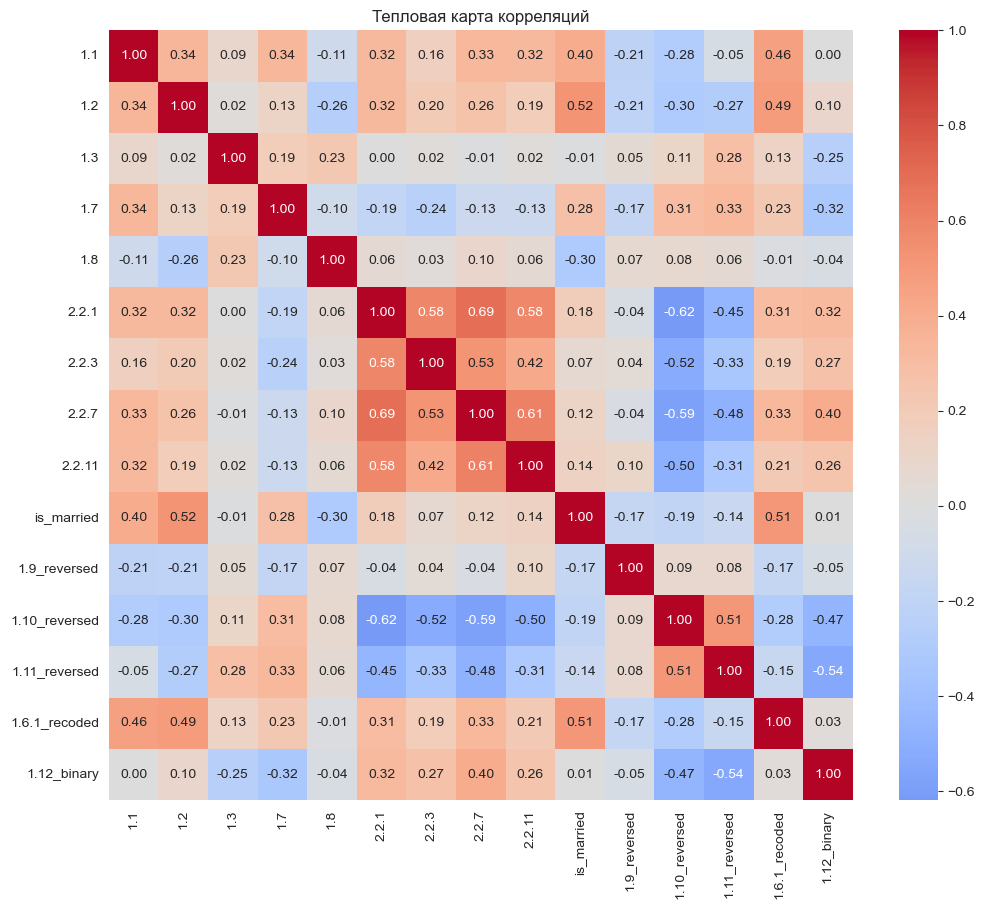

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Строим корреляционную матрицу
correlation_matrix = df_cleaned.corr()

# Настраиваем размер графика
plt.figure(figsize=(12, 10))

# Создаем тепловую карту
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)

# Заголовок
plt.title("Тепловая карта корреляций")

# Показываем график
plt.show()


Высокая корреляция (больше 0.8 или близко к этому):

2.2.1, 2.2.7: 0.692

2.2.1, 2.2.3: 0.584

2.2.1, 2.2.11: 0.580

2.2.7, 2.2.11: 0.614

2.2.7, 2.2.3: 0.526

1.10_reversed, 1.11_reversed: 0.509

1.10_reversed, 2.2.1: 0.619

1.10_reversed, 2.2.7: 0.590

1.10_reversed, 2.2.3: 0.523

1.10_reversed, 2.2.11: 0.498

1.11_reversed, 2.2.7: 0.483

🎯 Все эти корреляции высокие, но не критические, т.е. ни одна не превышает 0.8, поэтому жесткой мультиколлинеарности здесь нет.

In [187]:
correlation_matrix

,1.1,1.2,1.3,1.7,1.8,2.2.1,2.2.3,2.2.7,2.2.11,is_married,1.9_reversed,1.10_reversed,1.11_reversed,1.6.1_recoded,1.12_binary
1.1,1.000000,0.344654,0.090482,0.341889,-0.106626,0.323345,0.159104,0.332107,0.320483,0.402156,-0.209039,-0.277948,-0.050952,0.464865,0.001632
1.2,0.344654,1.000000,0.022197,0.126357,-0.260514,0.319990,0.199242,0.264154,0.186741,0.521402,-0.205894,-0.297131,-0.274475,0.489662,0.098191
1.3,0.090482,0.022197,1.000000,0.187006,0.225004,0.001958,0.022976,-0.009329,0.018156,-0.008525,0.046870,0.105857,0.282980,0.127246,-0.253731
1.7,0.341889,0.126357,0.187006,1.000000,-0.099637,-0.185844,-0.243107,-0.125846,-0.126772,0.277090,-0.170551,0.308958,0.329810,0.225214,-0.322626
1.8,-0.106626,-0.260514,0.225004,-0.099637,1.000000,0.062754,0.029362,0.098658,0.061300,-0.299287,0.066862,0.076609,0.059175,-0.013896,-0.041773
2.2.1,0.323345,0.319990,0.001958,-0.185844,0.062754,1.000000,0.584178,0.692063,0.580904,0.175214,-0.043209,-0.619078,-0.454983,0.305302,0.316659
2.2.3,0.159104,0.199242,0.022976,-0.243107,0.029362,0.584178,1.000000,0.526351,0.417694,0.069767,0.044273,-0.523260,-0.331727,0.187230,0.269565
2.2.7,0.332107,0.264154,-0.009329,-0.125846,0.098658,0.692063,0.526351,1.000000,0.613620,0.124230,-0.035036,-0.590286,-0.483402,0.332035,0.403568
2.2.11,0.320483,0.186741,0.018156,-0.126772,0.061300,0.580904,0.417694,0.613620,1.000000,0.138174,0.102386,-0.498337,-0.314410,0.210693,0.257431
is_married,0.402156,0.521402,-0.008525,0.277090,-0.299287,0.175214,0.069767,0.124230,0.138174,1.000000,-0.166075,-0.189647,-0.144386,0.511830,0.005467


In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Выбираем только нужные переменные
features = [
    '1.1', '1.2', '1.3', '1.7', '1.8', '2.2.1', '2.2.3', '2.2.7', '2.2.11',
    'is_married', '1.9_reversed', '1.10_reversed', '1.11_reversed',
    '1.6.1_recoded', '1.12_binary'
]

X = df_cleaned[features].dropna()

# Добавляем константу
X = sm.add_constant(X)

# Считаем VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Убираем константу из вывода
vif_data = vif_data[vif_data['Variable'] != 'const']
print(vif_data)


         Variable       VIF
1             1.1  1.734229
2             1.2  1.730931
3             1.3  1.239547
4             1.7  1.674706
5             1.8  1.298813
6           2.2.1  2.634576
7           2.2.3  1.713158
8           2.2.7  2.734175
9          2.2.11  1.893664
10     is_married  1.804262
11   1.9_reversed  1.158693
12  1.10_reversed  2.377703
13  1.11_reversed  1.963286
14  1.6.1_recoded  1.816422
15    1.12_binary  1.640327


VIF < 5 → всё ок, переменная не мультиколлинеарна

VIF > 5 → может быть проблема, особенно если > 10 — уже точно плохо

Самое большое значение — 2.73 у переменной 2.2.7, что всё ещё далеко от опасной зоны.

Большинство переменных — в пределах 1.5–2.0, что говорит о низком уровне корреляции между ними в регрессионной модели.

In [189]:
import statsmodels.api as sm

# Зависимая переменная
y = df_cleaned['1.12_binary']

# Независимые переменные
X = df_cleaned[
    ['1.1', '1.2', '1.3', '1.7', '1.8', '2.2.1', '2.2.3', '2.2.7', '2.2.11',
     'is_married', '1.9_reversed', '1.10_reversed', '1.11_reversed', '1.6.1_recoded']
]

# Убираем строки с пропущенными значениями (на всякий случай)
X = X.dropna()
y = y.loc[X.index]  # синхронизируем y

# Добавляем константу
X = sm.add_constant(X)

# Строим логистическую регрессию
logit_model = sm.Logit(y, X).fit()

# Выводим сводку
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.453501
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            1.12_binary   No. Observations:                 6828
Model:                          Logit   Df Residuals:                     6813
Method:                           MLE   Df Model:                           14
Date:                Tue, 07 Oct 2025   Pseudo R-squ.:                  0.3437
Time:                        06:43:00   Log-Likelihood:                -3096.5
converged:                       True   LL-Null:                       -4718.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.1861      0.398     23.053      0.000       8.405       9.967
1.1              -0.